## ***Required libraries***

In [1]:
# We import Google Colab Notebook of required libraries stored in our Drive space
from google.colab import drive

drive.mount('/content/drive')
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_libr.ipynb"

## ***Required functions***

In [2]:
# We import Google Colab Notebook of required functions stored in our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_func.ipynb"

## ***Setting up the environment and libraries***

In [3]:
# We import Google Colab Notebook of required set up stored in our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_envi.ipynb"

## ***Load dataset***

In [5]:
# We import Google Colab Notebook of required load dataset stored in our Drive space
%run "/content/drive/MyDrive/Colab Notebooks/PRODIA001_load.ipynb"

Dataset loaded


## ***EDA***

In [6]:
# Data information

# Dataframe visualization
print('Dataset head')
df_diabetes.head()

Dataset head


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Object shape analysis
print(f'The dataset contains {df_diabetes.shape[0]} rows and {df_diabetes.shape[1]} columns {df_diabetes.shape}')

The dataset contains 768 rows and 9 columns (768, 9)


In [8]:
# Displaying data types
print('Data types')
df_diabetes.info()

Data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# Value counter
print('Value counter')
df_diabetes.value_counts()

Value counter


0   1    2    3   4    5     6      7   8
0   57   60   0   0    21.7  0.735  67  0    1
    67   76   0   0    45.3  0.194  46  0    1
5   103  108  37  0    39.2  0.305  65  0    1
    104  74   0   0    28.8  0.153  48  0    1
    105  72   29  325  36.9  0.159  28  0    1
                                            ..
2   84   50   23  76   30.4  0.968  21  0    1
    85   65   0   0    39.6  0.930  27  0    1
    87   0    23  0    28.9  0.773  25  0    1
         58   16  52   32.7  0.166  25  0    1
17  163  72   41  114  40.9  0.817  47  1    1
Name: count, Length: 768, dtype: int64

***Missing and null values handling strategies***

In [10]:
# Null counting
print('Null values counting')
df_diabetes.isnull().sum()

Null values counting


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [11]:
# Checking for null values ​​in any row of the columns
print('Null values ​​in any instance (row) of the columns')
df_diabetes.isnull().any()

Null values ​​in any instance (row) of the columns


0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

In [12]:
# Checking if all columns in a row are null
print('Null values ​​in all columns of some instance (row)')
df_diabetes.isnull().all()

Null values ​​in all columns of some instance (row)


0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

In [13]:
# Missing values
print('Missing values')
df_diabetes.iloc[:, 0:8].replace(to_replace=[0], value=np.nan).isna().sum().reset_index(name = 'missing_values').rename(columns={"index": "variable"}).assign( percentage = lambda df_reset: round(df_reset.missing_values/len(df_diabetes)*100,2))

Missing values


,variable,missing_values,percentage
0,0,111,14.45
1,1,5,0.65
2,2,35,4.56
3,3,227,29.56
4,4,374,48.70
5,5,11,1.43
6,6,0,0.00
7,7,0,0.00


No missing values ​​graph


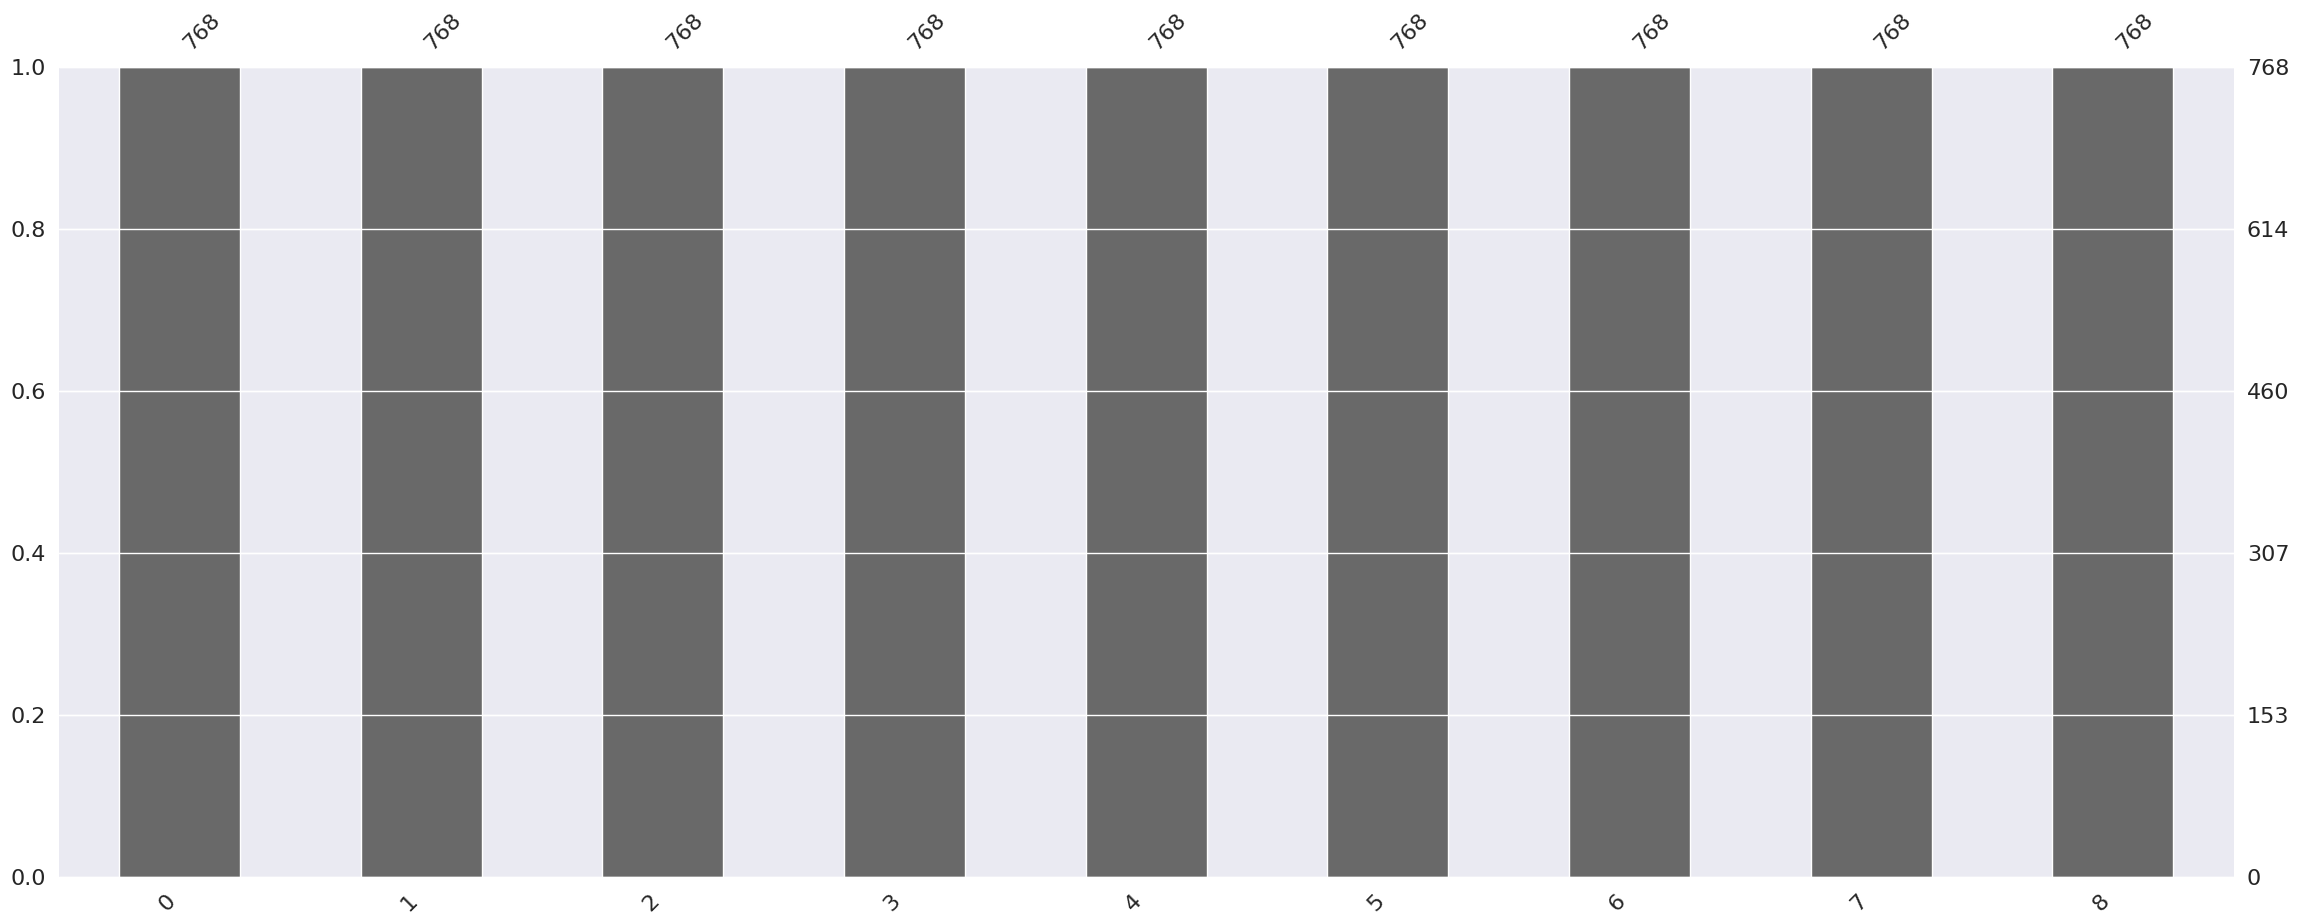

In [14]:
# No missing values ​​graph
print('No missing values ​​graph')
miss.bar(df_diabetes);

***Duplicate value management techniques***

In [15]:
# Checking for duplicate values

duplicate_values = df_diabetes.duplicated().sum()

if duplicate_values == 0:
    print(f'There are no duplicates, so they do not need to be removed')
else:
    print(f'The df contains {duplicate_values} duplicate values')
    print('Removing duplicates')
    df_diabetes.drop_duplicates(inplace=True)

df_diabetes

There are no duplicates, so they do not need to be removed


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


***Descripción general de atributos***

* El conjunto de datos consta de 768 instancias (de 0 a 767) y 9 atributos (sin duplicados), el cual contiene información médica de mujeres nativas Pima de Arizona (EEUU), que participaron en un estudio de la diabetes en la década de 1980.    

* Hay *9 variables (atributos)* en el conjunto de datos  
  0. ***embarazos***: ***Número de embarazos***.  
  1. ***glucosa***: ***Concentración de glucosa en plasma*** a las 2 horas en una prueba de tolerancia a la glucosa oral ($\frac{mg}{dL}$).    
  2. ***presión***: ***Presión arterial diastólica*** (mm Hg).  
  3. ***pliegue***: ***Grosor del pliegue cutáneo tricipital*** (mm).  
  4. ***insulina***: ***Concentración de insulina en suero*** a las 2 horas ($mu=\frac{U}{ml}; U=unidades\ de\ insulina$).  
  5. ***imc***: ***Índice de masa corporal*** ($\frac{peso\ en\ Kg}{(altura\ en\ m)^2}$).  
  6. ***antecedentes***: Función de diabetes basada en ***antecedentes familiares***.  
  7. ***edad***: ***Edad*** (años).  
  8. ***diabetes***: ***Variable target*** en la prueba (1=diabetes, 0=no diabetes).  

  ***¡Atención!***: No sabemos si la mujer está embarazada, en el momento de prueba de tolerancia a la glucosa oral. Por lo tanto, ***no podemos detectar la diabetes gestacional*** y eso es un fallo en nuestro dataset.

* Tipos de datos:  
  * La mayoría de las columnas (7 de 9) son del tipo int64, que representan valores enteros.  
  * Dos columnas (5 y 6) son de tipo float64 y representan valores de punto flotante.  

* Nulos y missing values: No parece haber missing ni null values en el conjunto de datos ya que cada columna tiene 768 entradas no nulas.  

* Valores duplicados: No hay valores duplicados presentes en el conjunto de datos, lo que garantiza la integridad y confiabilidad de los datos. Cada fila es única entre las 768 entradas.  

***Preprocesamiento de datos***

In [16]:
# Column format

# Array of column names
df_columns = np.array(['pregnancies', 'glucose', 'pressure', 'skinfold', 'insulin', 'bmi', 'pedigree', 'age', 'diabetes'])

# Assigning the array of column names
df_diabetes.columns = df_columns

# Display the defined columns of the df
print('df columns: ', df_diabetes.columns)

df columns:  Index(['pregnancies', 'glucose', 'pressure', 'skinfold', 'insulin', 'bmi',
       'pedigree', 'age', 'diabetes'],
      dtype='object')


In [17]:
# Individual statistical data summary
print('Statistical data summary')
df_diabetes.describe()

Statistical data summary


,pregnancies,glucose,pressure,skinfold,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Este método es demasiado resumido en nuestro caso. Falta la moda, la mediana, etc.  

Para solucionar este problema definimos nuestras propias funciones, con las que montamos un df.  

El df obtenido, nos debe permitir hacer un análisis estadístico perfecto de la curva correspondiente a cada categoría de datos.

***Individual variable analysis***

In [18]:
# Statistical functions
dt_emb  = funcEstadist(df_diabetes['pregnancies'])
dt_glu  = funcEstadist(df_diabetes['glucose'])
dt_pre  = funcEstadist(df_diabetes['pressure'])
dt_pli  = funcEstadist(df_diabetes['skinfold'])
dt_ins  = funcEstadist(df_diabetes['insulin'])
dt_imc  = funcEstadist(df_diabetes['bmi'])
dt_ant  = funcEstadist(df_diabetes['pedigree'])
dt_eda  = funcEstadist(df_diabetes['age'])
dt_dia  = funcEstadist(df_diabetes['diabetes'])

df_estad = {
'mean':                     [dt_emb[0], dt_glu[0], dt_pre[0], dt_pli[0], dt_ins[0], dt_imc[0], dt_ant[0], dt_eda[0], dt_dia[0]],
'median':                   [dt_emb[1], dt_glu[1], dt_pre[1], dt_pli[1], dt_ins[1], dt_imc[1], dt_ant[1], dt_eda[1], dt_dia[1]],
'mode':                     [dt_emb[2], dt_glu[2], dt_pre[2], dt_pli[2], dt_ins[2], dt_imc[2], dt_ant[2], dt_eda[2], dt_dia[2]],
'total no. rows':           [dt_emb[3], dt_glu[3], dt_pre[3], dt_pli[3], dt_ins[3], dt_imc[3], dt_ant[3], dt_eda[3], dt_dia[3]],
'bias (central tendency)':  [dt_emb[4], dt_glu[4], dt_pre[4], dt_pli[4], dt_ins[4], dt_imc[4], dt_ant[4], dt_eda[4], dt_dia[4]],
'minimum':                  [dt_emb[5], dt_glu[5], dt_pre[5], dt_pli[5], dt_ins[5], dt_imc[5], dt_ant[5], dt_eda[5], dt_dia[5]],
'maximum':                  [dt_emb[6], dt_glu[6], dt_pre[6], dt_pli[6], dt_ins[6], dt_imc[6], dt_ant[6], dt_eda[6], dt_dia[6]],
'range':                    [dt_emb[7], dt_glu[7], dt_pre[7], dt_pli[7], dt_ins[7], dt_imc[7], dt_ant[7], dt_eda[7], dt_dia[7]],
'standard deviation':       [dt_emb[8], dt_glu[8], dt_pre[8], dt_pli[8], dt_ins[8], dt_imc[8], dt_ant[8], dt_eda[8], dt_dia[8]],
'variance':                 [dt_emb[9], dt_glu[9], dt_pre[9], dt_pli[9], dt_ins[9], dt_imc[9], dt_ant[9], dt_eda[9], dt_dia[9]],
'variance control':         [dt_emb[10], dt_glu[10], dt_pre[10], dt_pli[10], dt_ins[10], dt_imc[10], dt_ant[10], dt_eda[10], dt_dia[10]],
'quartile 1':               [dt_emb[11], dt_glu[11], dt_pre[11], dt_pli[11], dt_ins[11], dt_imc[11], dt_ant[11], dt_eda[11], dt_dia[11]],
'quartile 2':               [dt_emb[12], dt_glu[12], dt_pre[12], dt_pli[12], dt_ins[12], dt_imc[12], dt_ant[12], dt_eda[12], dt_dia[12]],
'quartile 3':               [dt_emb[13], dt_glu[13], dt_pre[13], dt_pli[13], dt_ins[13], dt_imc[13], dt_ant[13], dt_eda[13], dt_dia[13]],
'IQR':                      [dt_emb[14], dt_glu[14], dt_pre[14], dt_pli[14], dt_ins[14], dt_imc[14], dt_ant[14], dt_eda[14], dt_dia[14]],
'% IQR':                    [dt_emb[15], dt_glu[15], dt_pre[15], dt_pli[15], dt_ins[15], dt_imc[15], dt_ant[15], dt_eda[15], dt_dia[15]],
'asymmetry':                [dt_emb[16], dt_glu[16], dt_pre[16], dt_pli[16], dt_ins[16], dt_imc[16], dt_ant[16], dt_eda[16], dt_dia[16]],
'bias (asymmetry)':         [dt_emb[17], dt_glu[17], dt_pre[17], dt_pli[17], dt_ins[17], dt_imc[17], dt_ant[17], dt_eda[17], dt_dia[17]],
'kurtosis':                 [dt_emb[18], dt_glu[18], dt_pre[18], dt_pli[18], dt_ins[18], dt_imc[18], dt_ant[18], dt_eda[18], dt_dia[18]],
'kurtosis distribution':    [dt_emb[19], dt_glu[19], dt_pre[19], dt_pli[19], dt_ins[19], dt_imc[19], dt_ant[19], dt_eda[19], dt_dia[19]],
'no. of rows with zeroes':  [dt_emb[20], dt_glu[20], dt_pre[20], dt_pli[20], dt_ins[20], dt_imc[20], dt_ant[20], dt_eda[20], dt_dia[20]],
'% rows with zeroes':       [dt_emb[21], dt_glu[21], dt_pre[21], dt_pli[21], dt_ins[21], dt_imc[21], dt_ant[21], dt_eda[21], dt_dia[21]],
'lower limit outliers':     [dt_emb[22], dt_glu[22], dt_pre[22], dt_pli[22], dt_ins[22], dt_imc[22], dt_ant[22], dt_eda[22], dt_dia[22]],
'upper limit outliers':     [dt_emb[23], dt_glu[23], dt_pre[23], dt_pli[23], dt_ins[23], dt_imc[23], dt_ant[23], dt_eda[23], dt_dia[23]],
'outliers number':          [dt_emb[24], dt_glu[24], dt_pre[24], dt_pli[24], dt_ins[24], dt_imc[24], dt_ant[24], dt_eda[24], dt_dia[24]],
'% outliers':               [dt_emb[25], dt_glu[25], dt_pre[25], dt_pli[25], dt_ins[25], dt_imc[25], dt_ant[25], dt_eda[25], dt_dia[25]],
'dispersion coefficient':   [dt_emb[26], dt_glu[26], dt_pre[26], dt_pli[26], dt_ins[26], dt_imc[26], dt_ant[26], dt_eda[26], dt_dia[26]]
            }

indexes = ['pregnancies', 'glucose', 'pressure', 'skinfold', 'insulin', 'bmi', 'pedigree', 'age', 'diabetes']
columns = ['mean', 'median', 'mode', 'total no. rows', 'no. of rows with zeroes', '% rows with zeroes',
           'lower limit outliers', 'upper limit outliers', 'outliers number', '% outliers',
           'minimum', 'maximum', 'range',
           'standard deviation', 'dispersion coefficient',
           'variance', 'variance control', 'quartile 1', 'quartile 2', 'quartile 3', 'IQR', '% IQR',
           'asymmetry', 'bias (central tendency)', 'bias (asymmetry)', 'kurtosis', 'kurtosis distribution']

df_estad = pd.DataFrame(data=df_estad, index=indexes, columns=columns, dtype=str)
df_estad = df_estad.transpose()

df_estad

,pregnancies,glucose,pressure,skinfold,insulin,bmi,pedigree,age,diabetes
mean,3.85,120.89,69.11,20.54,79.8,31.99,0.47,33.24,0.35
median,3.0,117.0,72.0,23.0,30.5,32.0,0.37,29.0,0.0
mode,1,100,70,0,0,32.0,0.26,22,0
total no. rows,768,768,768,768,768,768,768,768,768
no. of rows with zeroes,111,5,35,227,374,11,0,0,500
% rows with zeroes,14.45,0.65,4.56,29.56,48.7,1.43,0.0,0.0,65.1
lower limit outliers,0,37.12,35.0,0,0,13.35,0,0,0
upper limit outliers,13.5,202.12,107.0,80.0,318.12,50.55,1.21,66.5,2.5
outliers number,4,5,45,1,34,19,29,9,0
% outliers,0.52,0.65,5.86,0.13,4.43,2.47,3.78,1.17,0.0


In [19]:
# Obesity - BMI
prom_imc = funcPromedio(df_diabetes['bmi'])
vimc_pro = funcObesidadImc(prom_imc)

medi_imc = funcMediana(df_diabetes['bmi'])
vimc_med = funcObesidadImc(medi_imc)

moda_imc = funcModa(df_diabetes['bmi'])
vimc_mod = funcObesidadImc(moda_imc)

rang_imc = funcRango(df_diabetes['bmi'])
vimc_ran = funcObesidadImc(rang_imc)

linf_imc = funcLimInfOutliers(df_diabetes['bmi'])
vimc_lin = funcObesidadImc(linf_imc)

lsup_imc = funcLimSupOutliers(df_diabetes['bmi'])
vimc_lsu = funcObesidadImc(lsup_imc)

mini_imc = funcMin(df_diabetes['bmi'])
vimc_min = funcObesidadImc(mini_imc)

maxi_imc = funcMax(df_diabetes['bmi'])
vimc_max = funcObesidadImc(maxi_imc)

df_estadistImc = {
'mean BMI': [prom_imc],
'mean BMI rating': [vimc_pro],
'median BMI': [medi_imc],
'median BMI rating': [vimc_med],
'mode BMI': [moda_imc],
'mode BMI rating': [vimc_mod],
'range BMI': [rang_imc],
'range BMI rating': [vimc_ran],
'lower limit outliers BMI': [linf_imc],
'lower limit outliers BMI rating': [vimc_lin],
'upper limit outliers BMI': [lsup_imc],
'upper limit outliers BMI rating': [vimc_lsu],
'minimum BMI': [mini_imc],
'minimum BMI rating': [vimc_min],
'maximum BMI': [maxi_imc],
'maximum BMI rating': [vimc_max]
}

indexes = ['bmi']
columns = ['mean BMI', 'mean BMI rating', 'median BMI', 'median BMI rating',
           'mode BMI', 'mode BMI rating', 'range BMI', 'range BMI range',
           'lower limit outliers BMI', 'lower limit outliers BMI rating',
           'upper limit outliers BMI', 'upper limit outliers BMI rating',
           'minimum BMI', 'minimum BMI rating', 'maximum BMI', 'maximum BMI rating']

df_data_estadistImc = pd.DataFrame(data=df_estadistImc, index=indexes, columns=columns, dtype=str)
df_data_estadistImc = df_data_estadistImc.transpose()

df_data_estadistImc

,bmi
mean BMI,31.99
mean BMI rating,obesity I
median BMI,32.0
median BMI rating,obesity I
mode BMI,32.0
mode BMI rating,obesity I
range BMI,67.1
range BMI range,NaN
lower limit outliers BMI,13.35
lower limit outliers BMI rating,thinness


In [ ]:
# Resumen variables
df_emb  = funcResumen_Variables(df_diabetes['embarazos'],    ' ')
df_glu  = funcResumen_Variables(df_diabetes['glucosa'],      'X')
df_pre  = funcResumen_Variables(df_diabetes['presión'],      'X')
df_pli  = funcResumen_Variables(df_diabetes['pliegue'],      'X')
df_ins  = funcResumen_Variables(df_diabetes['insulina'],     'X')
df_imc  = funcResumen_Variables(df_diabetes['imc'],          'X')
df_ant  = funcResumen_Variables(df_diabetes['antecedentes'], ' ')
df_eda  = funcResumen_Variables(df_diabetes['edad'],         ' ')
df_dia  = funcResumen_Variables(df_diabetes['diabetes'],     ' ')

df_resumen = {
'tipo':                [df_emb[0], df_glu[0], df_pre[0], df_pli[0], df_ins[0], df_imc[0], df_ant[0], df_eda[0], df_dia[0]],
'total':               [df_emb[1], df_glu[1], df_pre[1], df_pli[1], df_ins[1], df_imc[1], df_ant[1], df_eda[1], df_dia[1]],
'ceros':               [df_emb[2], df_glu[2], df_pre[2], df_pli[2], df_ins[2], df_imc[2], df_ant[2], df_eda[2], df_dia[2]],
'no ceros':            [df_emb[3], df_glu[3], df_pre[3], df_pli[3], df_ins[3], df_imc[3], df_ant[3], df_eda[3], df_dia[3]],
'% no ceros':          [df_emb[4], df_glu[4], df_pre[4], df_pli[4], df_ins[4], df_imc[4], df_ant[4], df_eda[4], df_dia[4]],
'no debe tener ceros': [df_emb[5], df_glu[5], df_pre[5], df_pli[5], df_ins[5], df_imc[5], df_ant[5], df_eda[5], df_dia[5]],
'moda':                [df_emb[6], df_glu[6], df_pre[6], df_pli[6], df_ins[6], df_imc[6], df_ant[6], df_eda[6], df_dia[6]]
             }

indexes = ['embarazos', 'glucosa', 'presión','pliegue', 'insulina', 'imc', 'antecedentes', 'edad', 'diabetes']
columns = ['tipo', 'total', 'ceros', 'no ceros', '% no ceros', 'no debe tener ceros', 'moda']

df_resumen = pd.DataFrame(data=df_resumen, index=indexes, columns=columns, dtype=str)
df_resumen = df_resumen.transpose()

df_resumen

,embarazos,glucosa,presión,pliegue,insulina,imc,antecedentes,edad,diabetes
tipo,int64,int64,int64,int64,int64,float64,float64,int64,int64
total,768,768,768,768,768,768,768,768,768
ceros,111,5,35,227,374,11,0,0,500
no ceros,657,763,733,541,394,757,768,768,268
% no ceros,85.55,99.35,95.44,70.44,51.3,98.57,100.0,100.0,34.9
no debe tener ceros,,X,X,X,X,X,,,
moda,1,100,70,0,0,32.0,0.26,22,0


### ***Feature Engineering***


***Tratamiento outliers***  

* Eliminaremos las características: pliegue e insulina.
* Limpiaremos de outliers las características: embarazos, glucosa, presión, imc y edad.

***Características numéricas***  

* embarazos:
  * Algunas mujeres de la muestra tienen muchos hijos (12 o más), aunque la mayoría tienen pocos, lo normal es tener solo 1 hijo.
  * Parece que en la gráfica de esta categoría debería haber una distribución sesgada hacia la derecha y achatada (alrededor de 3 aproximadamente).  
  * Dispersión de datos alta.
  * Hay errores en las muestras, cuando se miden más de 12 embarazos (todos ellos outliers, aunque eso solo pasa en 4 casos).
  * Tendremos que volver a analizar la gráfica después de implementar alguna estrategia de tratamiento de outliers, debido a que éstos pueden falsearla.

* glucosa:
  * Hay un pequeño porcentaje de mujeres (0.65%) que tienen un nivel de glucosa en sangre de 0, lo cual es claramente un error.   
  * Los valores 0 en esta categoría coincide con el número de outliers (5).
  * Por debajo de 37.12 se considera outlier y por encima de 202.12, se considera outliers, lo cual quiere decir que:
    1. Los 5 casos de mujeres que tienen 0, son errores o falta de datos y estos son todos los outliers detectados.
    2. Algunas mujeres parecen padecer una hipoglucemia muy grave y algunas otras parecen padecer hiperglucemia. Como nuestro dataset está etiquetado, sabemos la incidencia de diabetes, en todos los casos.
  * La mayoría de las mujeres parecen tener un nivel de glucemia normalparecen padecer.
  * No disponemos de datos para valorar diabetes gestacional.
  * Parece que en la gráfica de esta categoría debería haber una distribución sesgada hacia la derecha y achatada (alrededor de 117 aproximadamente).
  * Dispersión de datos baja.
  * Tendremos que volver a analizar la gráfica después de implementar alguna estrategia de tratamiento de outliers, debido a que éstos pueden falsearla.

* presión:    
  * Hay porcentaje de mujeres (4.56%) que tienen una presión diastólica de 0, lo cual es claramente un error.   
  * Los valores 0 en esta categoría (35) casi coincide con el número de outliers (45).
  * Por debajo de 35.0 y por encima de 107.0, se considera outliers, lo cual quiere decir que:
    1. Los 35 casos de mujeres que tienen 0, son errores o falta de datos y estos son todos los outliers detectados.
    2. Algunas mujeres parecen padecer una hipotensión muy grave y algunas otras parecen padecer hipertensión. Como nuestro dataset está etiquetado, sabemos la incidencia de diabetes, en todos los casos.
  * La presión diastólica se distribuye en torno a 72.0 y parece corresponderse a una población algo envejecida aunque hipotensa.
  * Parece que lo normal es que las mujeres sean ligeramente hipotensas (70.0).
  * Parece que en la gráfica de esta categoría debería haber una distribución sesgada hacia la izquierda y puntiaguda (alrededor de 72 aproximadamente).
  * Dispersión de datos baja.
  * Tendremos que volver a analizar la gráfica después de implementar alguna estrategia de tratamiento de outliers, debido a que éstos pueden falsearla.  

* pliegue:
  * El % de ceros (29.56%), que también son outliers en este caso, es > 20%, por lo tanto es intratable. ***Eliminaremos la característica***.

* insulina:
  * El % de ceros (48.7%), que también son outliers en este caso, es > 20%, por lo tanto es intratable. ***Eliminaremos la característica***.

* imc:  
  * Parece que estas mujeres son, en general, obesas (tipo I) y en algunos casos podrían padecer, incluso, obesidad mórbida (tipo III).
  * Hay porcentaje de mujeres (1.43%) que tienen un imc de 0, lo cual es claramente un error.   
  * Los valores 0 en esta categoría (11) casi coincide con el número de outliers (19).
  * Parece que en la gráfica de esta categoría debería haber una distribución sesgada hacia la izquierda y puntiaguda (alrededor de 32 aproximadamente).
  * Dispersión de datos baja.
  * Tendremos que volver a analizar la gráfica después de implementar alguna estrategia de tratamiento de outliers, debido a que éstos pueden falsearla.

* antecedentes:   
  * No hay ningún valor 0, lo cual quiere decir que, la incidencia de la diabetes, en esta población, ha sido muy alta.  
  * Encontramos un % de outliers alto (3.78), solamente superado por otra categoría (presión arterial diastólica).
  * Por encima de 1.21, se considera outliers.
  * La mayoría de las mujeres tienen antecedentes de 0.26 (lo cual es un valor bajo).
  * Parece que en la gráfica de esta categoría debería haber una distribución sesgada hacia la derecha y muy puntiaguda (alrededor de 0.37 aproximadamente).  
  *  Dispersión de datos media.
  * Tendremos que volver a analizar la gráfica después de implementar alguna estrategia de tratamiento de outliers, debido a que éstos pueden falsearla.  

* edad:     
  * No hay ningún valor 0, lo cual indica que la recogida de datos de esta categoría se hace con mujeres de > 0 años (meses).  
  * El promedio de la edad de las mujeres del dataset es de 33.24 años.  
  * La edad más repetida es de 22 años, lo cual indica que la mayoría de las mujeres están en su edad fértil.
  * Encontramos un % de outliers muy bajo (1.17%).
  * Por encima de 66,5 años, se considera outliers.
  * La población es, en definitiva, relatívamente joven.
  * Parece que en la gráfica de esta categoría debería haber una distribución sesgada hacia la derecha y ligeramente puntiaguda (alrededor de 29 años aproximadamente).  
  * Dispersión de datos media.
  * Tendremos que volver a analizar la gráfica después de implementar alguna estrategia de tratamiento de outliers, debido a que éstos pueden falsearla.  








In [ ]:
# Contamos las filas que quedarian, si eliminásemos los ceros
df_NoCeros = df_diabetes.drop(
                              df_diabetes[
                             (df_diabetes['glucosa'] == 0)
                           | (df_diabetes['presión'] == 0)
                           | (df_diabetes['pliegue'] == 0)
                           | (df_diabetes['insulina'] == 0)
                           | (df_diabetes['imc'] == 0)
                              ].index)

noCeros = df_NoCeros['embarazos'].count()
total   = df_diabetes['embarazos'].count()

print('Filas totales sin limpiar:',total)
print('Filas límpias            :',noCeros)
print('% filas tras la limpieza :',str(round(noCeros/total*100,2))+'%')

Filas totales sin limpiar: 768
Filas límpias            : 392
% filas tras la limpieza : 51.04%


***Conclusiones***  

Está claro que hay que buscar una estrategia diferente a la de eliminar, simplemente, las filas que tienen outliers.  

Si eliminásemos las filas con outliers, nos quedaríamos con la mitad de los datos y esto reduciría nuestras espectativas, para clasificar o hacer predicciones, con el dataset.  

Escogeremos el ***algorimo de imputación del promedio, para eliminar outliers del dataset***, pero manteniendo las filas (mediciones). Esto se suele hacer ***cuando queremos conservar la mayor cantidad de datos, pero eliminando el efecto de los outliers***.  

Estrategia (por cada característica en la que queramos eliminar los outliers):
1. ***Obtendremos el intervalo de los no outliers***.
2. ***Obtendremos el promedio de los no outliers***.
3. ***Substituiremos los outliers por el promedio obtenido***.

In [ ]:
# Eliminamos categorías con > 20% outliers
df_diabetes.drop(columns=['pliegue', 'insulina'], inplace=True)

df_diabetes

,embarazos,glucosa,presión,imc,antecedentes,edad,diabetes
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101,76,32.9,0.171,63,0
764,2,122,70,36.8,0.340,27,0
765,5,121,72,26.2,0.245,30,0
766,1,126,60,30.1,0.349,47,1


In [ ]:
# Obtención promedio no outliers
df_emb  = funcGetPromNoOutliers(df_diabetes['embarazos'],    0)
df_glu  = funcGetPromNoOutliers(df_diabetes['glucosa'],      1)
df_pre  = funcGetPromNoOutliers(df_diabetes['presión'],      1)
df_imc  = funcGetPromNoOutliers(df_diabetes['imc'],          1)
df_ant  = funcGetPromNoOutliers(df_diabetes['antecedentes'], 0)

df_promedio = {
'valor no outliers':        [df_emb[0], df_glu[0], df_pre[0], df_imc[0], df_ant[0]],
'número no outliers':       [df_emb[1], df_glu[1], df_pre[1], df_imc[1], df_ant[1]],
'promedio no outliers':     [df_emb[2], df_glu[2], df_pre[2], df_imc[2], df_ant[2]]
              }

indexes = ['embarazos', 'glucosa', 'presión', 'imc', 'antecedentes']
columns = ['valor no outliers', 'número no outliers', 'promedio no outliers']

df_promedio = pd.DataFrame(data=df_promedio, index=indexes, columns=columns, dtype=str)
df_promedio = df_promedio.transpose()

df_promedio

,embarazos,glucosa,presión,imc,antecedentes
valor no outliers,2893,92847,52207,24120.8,317.65
número no outliers,764,763,723,749,739
promedio no outliers,3.79,121.69,72.21,32.2,0.43


In [ ]:
# Imputación outliers
df_emb  = funcImputacion(df_diabetes['embarazos']   , 0)
df_glu  = funcImputacion(df_diabetes['glucosa']     , 1)
df_pre  = funcImputacion(df_diabetes['presión']     , 1)
df_imc  = funcImputacion(df_diabetes['imc']         , 1)
df_ant  = funcImputacion(df_diabetes['antecedentes'], 0)

df_imputado = {
'ceros (antes)':            [df_emb[0], df_glu[0], df_pre[0], df_imc[0], df_ant[0]],
'% ceros (antes)':          [df_emb[1], df_glu[1], df_pre[1], df_imc[1], df_ant[1]],
'outliers (antes)':         [df_emb[2], df_glu[2], df_pre[2], df_imc[2], df_ant[2]],
'% outliers (antes)':       [df_emb[3], df_glu[3], df_pre[3], df_imc[3], df_ant[3]],
'ceros (imputado)':         [df_emb[4], df_glu[4], df_pre[4], df_imc[4], df_ant[4]],
'% ceros (imputado)':       [df_emb[5], df_glu[5], df_pre[5], df_imc[5], df_ant[5]],
'outliers (imputado)':      [df_emb[6], df_glu[6], df_pre[6], df_imc[6], df_ant[6]],
'% outliers (imputado)':    [df_emb[7], df_glu[7], df_pre[7], df_imc[7], df_ant[7]]
              }

indexes = ['embarazos', 'glucosa', 'presión', 'imc', 'antecedentes']
columns = ['ceros (antes)',    '% ceros (antes)',    'outliers (antes)',    '% outliers (antes)',
           'ceros (imputado)', '% ceros (imputado)', 'outliers (imputado)', '% outliers (imputado)']

df_imputado = pd.DataFrame(data=df_imputado, index=indexes, columns=columns, dtype=str)
df_imputado = df_imputado.transpose()

df_imputado

,embarazos,glucosa,presión,imc,antecedentes
ceros (antes),111,5,35,11,0
% ceros (antes),14.45,0.65,4.56,1.43,0.0
outliers (antes),4,5,45,19,29
% outliers (antes),0.52,0.65,5.86,2.47,3.78
ceros (imputado),111,0,0,0,0
% ceros (imputado),14.45,0.0,0.0,0.0,0.0
outliers (imputado),0,0,4,3,15
% outliers (imputado),0.0,0.0,0.52,0.39,1.95


In [ ]:
# Función datos estadísticos (depués de la imputación de outliers)
dt_emb  = funcEstadist(df_diabetes['embarazos'])
dt_glu  = funcEstadist(df_diabetes['glucosa'])
dt_pre  = funcEstadist(df_diabetes['presión'])
dt_imc  = funcEstadist(df_diabetes['imc'])
dt_ant  = funcEstadist(df_diabetes['antecedentes'])
dt_eda  = funcEstadist(df_diabetes['edad'])
dt_dia  = funcEstadist(df_diabetes['diabetes'])

df_estad =  {
'promedio':                 [dt_emb[0], dt_glu[0], dt_pre[0], dt_imc[0], dt_ant[0], dt_eda[0], dt_dia[0]],
'mediana':                  [dt_emb[1], dt_glu[1], dt_pre[1], dt_imc[1], dt_ant[1], dt_eda[1], dt_dia[1]],
'moda':                     [dt_emb[2], dt_glu[2], dt_pre[2], dt_imc[2], dt_ant[2], dt_eda[2], dt_dia[2]],
'nº total filas':           [dt_emb[3], dt_glu[3], dt_pre[3], dt_imc[3], dt_ant[3], dt_eda[3], dt_dia[3]],
'sesgo (tendencia central)':[dt_emb[4], dt_glu[4], dt_pre[4], dt_imc[4], dt_ant[4], dt_eda[4], dt_dia[4]],
'mínimo':                   [dt_emb[5], dt_glu[5], dt_pre[5], dt_imc[5], dt_ant[5], dt_eda[5], dt_dia[5]],
'máximo':                   [dt_emb[6], dt_glu[6], dt_pre[6], dt_imc[6], dt_ant[6], dt_eda[6], dt_dia[6]],
'rango':                    [dt_emb[7], dt_glu[7], dt_pre[7], dt_imc[7], dt_ant[7], dt_eda[7], dt_dia[7]],
'desviación estándar':      [dt_emb[8], dt_glu[8], dt_pre[8], dt_imc[8], dt_ant[8], dt_eda[8], dt_dia[8]],
'varianza':                 [dt_emb[9], dt_glu[9], dt_pre[9], dt_imc[9], dt_ant[9], dt_eda[9], dt_dia[9]],
'control varianza':         [dt_emb[10], dt_glu[10], dt_pre[10], dt_imc[10], dt_ant[10], dt_eda[10], dt_dia[10]],
'quartil 1':                [dt_emb[11], dt_glu[11], dt_pre[11], dt_imc[11], dt_ant[11], dt_eda[11], dt_dia[11]],
'quartil 2':                [dt_emb[12], dt_glu[12], dt_pre[12], dt_imc[12], dt_ant[12], dt_eda[12], dt_dia[12]],
'quartil 3':                [dt_emb[13], dt_glu[13], dt_pre[13], dt_imc[13], dt_ant[13], dt_eda[13], dt_dia[13]],
'IQR':                      [dt_emb[14], dt_glu[14], dt_pre[14], dt_imc[14], dt_ant[14], dt_eda[14], dt_dia[14]],
'% IQR':                    [dt_emb[15], dt_glu[15], dt_pre[15], dt_imc[15], dt_ant[15], dt_eda[15], dt_dia[15]],
'asimetría':                [dt_emb[16], dt_glu[16], dt_pre[16], dt_imc[16], dt_ant[16], dt_eda[16], dt_dia[16]],
'sesgo (asimetría)':        [dt_emb[17], dt_glu[17], dt_pre[17], dt_imc[17], dt_ant[17], dt_eda[17], dt_dia[17]],
'curtosis':                 [dt_emb[18], dt_glu[18], dt_pre[18], dt_imc[18], dt_ant[18], dt_eda[18], dt_dia[18]],
'distribución curtosis':    [dt_emb[19], dt_glu[19], dt_pre[19], dt_imc[19], dt_ant[19], dt_eda[19], dt_dia[19]],
'nº filas con ceros':       [dt_emb[20], dt_glu[20], dt_pre[20], dt_imc[20], dt_ant[20], dt_eda[20], dt_dia[20]],
'% filas con ceros':        [dt_emb[21], dt_glu[21], dt_pre[21], dt_imc[21], dt_ant[21], dt_eda[21], dt_dia[21]],
'límite inferior outliers': [dt_emb[22], dt_glu[22], dt_pre[22], dt_imc[22], dt_ant[22], dt_eda[22], dt_dia[22]],
'límite seperior outliers': [dt_emb[23], dt_glu[23], dt_pre[23], dt_imc[23], dt_ant[23], dt_eda[23], dt_dia[23]],
'número outliers':          [dt_emb[24], dt_glu[24], dt_pre[24], dt_imc[24], dt_ant[24], dt_eda[24], dt_dia[24]],
'% outliers':               [dt_emb[25], dt_glu[25], dt_pre[25], dt_imc[25], dt_ant[25], dt_eda[25], dt_dia[25]],
'coeficiente de dispersión':[dt_emb[26], dt_glu[26], dt_pre[26], dt_imc[26], dt_ant[26], dt_eda[26], dt_dia[26]]
            }

indexes = ['embarazos', 'glucosa', 'presión', 'imc', 'antecedentes', 'edad', 'diabetes']
columns = ['promedio', 'mediana', 'moda', 'nº total filas', 'nº filas con ceros', '% filas con ceros',
           'límite inferior outliers', 'límite seperior outliers', 'número outliers', '% outliers',
           'mínimo', 'máximo', 'rango',
           'desviación estándar', 'coeficiente de dispersión',
           'varianza', 'control varianza', 'quartil 1', 'quartil 2', 'quartil 3', 'IQR', '% IQR',
           'asimetría', 'sesgo (tendencia central)', 'sesgo (asimetría)', 'curtosis', 'distribución curtosis']

df_estad = pd.DataFrame(data=df_estad, index=indexes, columns=columns, dtype=str)
df_estad = df_estad.transpose()

df_estad

,embarazos,glucosa,presión,imc,antecedentes,edad,diabetes
promedio,3.79,121.69,72.21,32.2,0.43,33.24,0.35
mediana,3.0,117.0,72.21,32.2,0.37,29.0,0.0
moda,1.0,100.0,70.0,32.2,0.43,22,0
nº total filas,768,768,768,768,768,768,768
nº filas con ceros,111,0,0,0,0,0,500
% filas con ceros,14.45,0.0,0.0,0.0,0.0,0.0,65.1
límite inferior outliers,0,39.0,40.0,14.3,0,0,0
límite seperior outliers,13.5,201.0,104.0,49.5,1.09,66.5,2.5
número outliers,0,0,4,3,15,9,0
% outliers,0.0,0.0,0.52,0.39,1.95,1.17,0.0


In [ ]:
# Obesidad - Imc
prom_imc = funcPromedio(df_diabetes['imc'])
vimc_pro = funcObesidadImc(prom_imc)

medi_imc = funcMediana(df_diabetes['imc'])
vimc_med = funcObesidadImc(medi_imc)

moda_imc = funcModa(df_diabetes['imc'])
vimc_mod = funcObesidadImc(moda_imc)

rang_imc = funcRango(df_diabetes['imc'])
vimc_ran = funcObesidadImc(rang_imc)

linf_imc = funcLimInfOutliers(df_diabetes['imc'])
vimc_lin = funcObesidadImc(linf_imc)

lsup_imc = funcLimSupOutliers(df_diabetes['imc'])
vimc_lsu = funcObesidadImc(lsup_imc)

mini_imc = funcMin(df_diabetes['imc'])
vimc_min = funcObesidadImc(mini_imc)

maxi_imc = funcMax(df_diabetes['imc'])
vimc_max = funcObesidadImc(maxi_imc)

df_estadistImc = {
'promedio imc': [prom_imc],
'valoración imc promedio': [vimc_pro],
'mediana imc': [medi_imc],
'valoración imc mediana': [vimc_med],
'moda imc': [moda_imc],
'valoración imc moda': [vimc_mod],
'rango imc': [rang_imc],
'valoración imc rango': [vimc_ran],
'límite inferior outliers imc': [linf_imc],
'valoración límite inferior outliers imc': [vimc_lin],
'límite superior outliers imc': [lsup_imc],
'valoración límite superior outliers imc': [vimc_lsu],
'mínimo imc': [mini_imc],
'valoración mínimo imc': [vimc_min],
'máximo imc': [maxi_imc],
'valoración máximo imc': [vimc_max]
}

indexes = ['imc']
columns = ['promedio imc', 'valoración imc promedio', 'mediana imc', 'valoración imc mediana',
           'moda imc', 'valoración imc moda', 'rango imc', 'valoración imc rango',
           'límite inferior outliers imc', 'valoración límite inferior outliers imc',
           'límite superior outliers imc', 'valoración límite superior outliers imc',
           'mínimo imc', 'valoración mínimo imc', 'máximo imc', 'valoración máximo imc']

df_data_estadistImc = pd.DataFrame(data=df_estadistImc, index=indexes, columns=columns, dtype=str)
df_data_estadistImc = df_data_estadistImc.transpose()

df_data_estadistImc

,imc
promedio imc,32.2
valoración imc promedio,obesidad I
mediana imc,32.2
valoración imc mediana,obesidad I
moda imc,32.2
valoración imc moda,obesidad I
rango imc,31.8
valoración imc rango,obesidad I
límite inferior outliers imc,14.3
valoración límite inferior outliers imc,delgadez


***Características numéricas (tras el tratamiento de outliers)***  

* embarazos:
  * Algunas mujeres de la muestra tienen muchos hijos (12 o más), aunque la mayoría tienen pocos, lo normal es tener solo 1 hijo.
  * Parece que en la gráfica de esta categoría debería haber una distribución sesgada hacia la derecha y achatada (alrededor de 3 aproximadamente).  
  * Dispersión de datos alta.
  * Los outliers que han sido totalmente eliminados del dataset.

* glucosa:  
  * Algunas mujeres padecen una hipoglucemia muy grave (44) y algunas otras padecen prediabetes (199), aunque la mayoría tiene un ínice glucémico normal (100).
  * Parece que en la gráfica de esta categoría debería haber una distribución sesgada hacia la derecha y achatada (alrededor de 117 aproximadamente).  
  * Dispersión de datos baja.
  * Los outliers que han sido totalmente eliminados del dataset.

* presión:    
  * La presión arterial diastólica normal ronda 70, lo cual indica una ligera hipotensión, aunque dentro del rango correcto.
  * Algunas mujeres padecen una hipotensión muy grave y algunas otras padecen hipertensión.
  * La presión diastólica se distribuye muy bien en torno al promedio y a la mediana y parece corresponderse a una población ligéramente hipotensa (72).
  * Parece que en la gráfica de esta categoría debería haber una distribución algo sesgada hacia la derecha y puntiaguda (alrededor de 72 aproximadamente).  
  * Dispersión de datos baja.
  * Los outliers que han quedado son totalmente tolerables.  

* imc:  
  * Parece que estas mujeres son, en general, obesas (tipo I) y en algunos casos podrían padecer, incluso, obesidad mórbida (tipo III).
  * Parece que hay una distribución gausiana, ligeramente sesgada a la derecha, en torno a 32, por lo tanto no debe haber mucho sesgo.  
  * Parece que la gráfica de esta categoría debería ser achatada (alrededor de 32 aproximadamente).  
  * Dispersión de datos baja.
  * Los outliers que han quedado son tolerables y los valores son razonables.

* antecedentes:   
  * La mayoría de las mujeres parecen tener pocos antecedentes de 0.4, pero no hay ninguna sin antecedentes.
  * Parece que en la gráfica de esta categoría debería haber una distribución algo sesgada hacia la derecha y muy puntiaguda (alrededor de 0.4 aproximadamente).  
  * Dispersión de datos media.
  * Los outliers que han quedado son tolerables.

* edad:     
  * Las mujeres de la muestra tienen entre 20 y 80 años, aproximadamente.  
  * La edad más repetida es de 22 años, lo cual indica que la mayoría de las mujeres están en su edad fértil.
  * La población es, en definitiva, relatívamente joven.
  * Parece que en la gráfica de esta categoría debería haber una distribución sesgada hacia la derecha y ligeramente puntiaguda (alrededor de 29 años aproximadamente).  
  * Dispersión de datos media.
  * Los outliers que han quedado son tolerables, aunque es el segundo más alto del dataset (1.17%). Los valores de edad son razonables, por ejemplo, no hay mujeres de 427 años.


***Análisis de variables individuales***

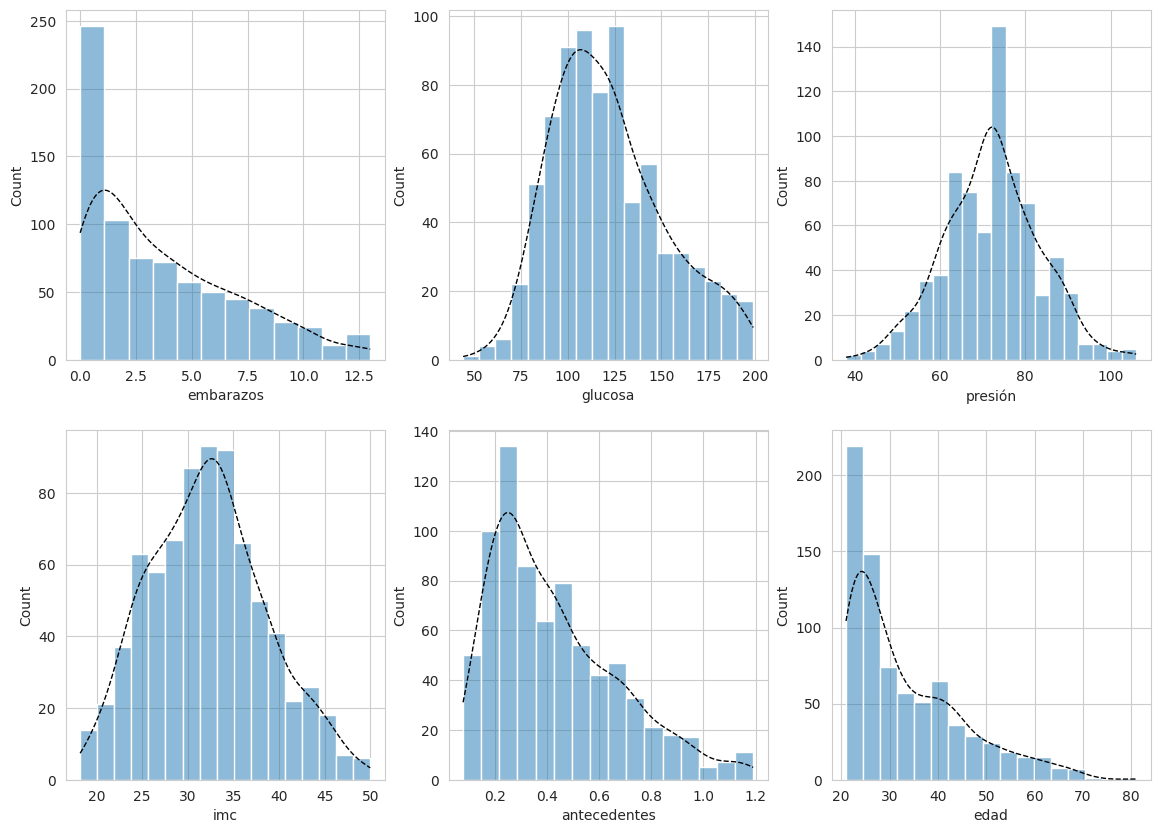

In [ ]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.histplot(x = df_diabetes['embarazos'], kde = True,
                 line_kws = {'linestyle':'dashed', 'linewidth':'1'}).lines[0].set_color('black')
plt.subplot(2,3,2)
sns.histplot(x = df_diabetes['glucosa'], kde = True,
                 line_kws = {'linestyle':'dashed', 'linewidth':'1'}).lines[0].set_color('black')
plt.subplot(2,3,3)
sns.histplot(x = df_diabetes['presión'], kde = True,
                 line_kws = {'linestyle':'dashed', 'linewidth':'1'}).lines[0].set_color('black')
plt.subplot(2,3,4)
sns.histplot(x = df_diabetes['imc'], kde = True,
                 line_kws = {'linestyle':'dashed', 'linewidth':'1'}).lines[0].set_color('black')
plt.subplot(2,3,5)
sns.histplot(x = df_diabetes['antecedentes'], kde = True,
                 line_kws = {'linestyle':'dashed', 'linewidth':'1'}).lines[0].set_color('black')
plt.subplot(2,3,6)
sns.histplot(x = df_diabetes['edad'], kde = True,
                 line_kws = {'linestyle':'dashed', 'linewidth':'1'}).lines[0].set_color('black')

<Axes: xlabel='edad'>

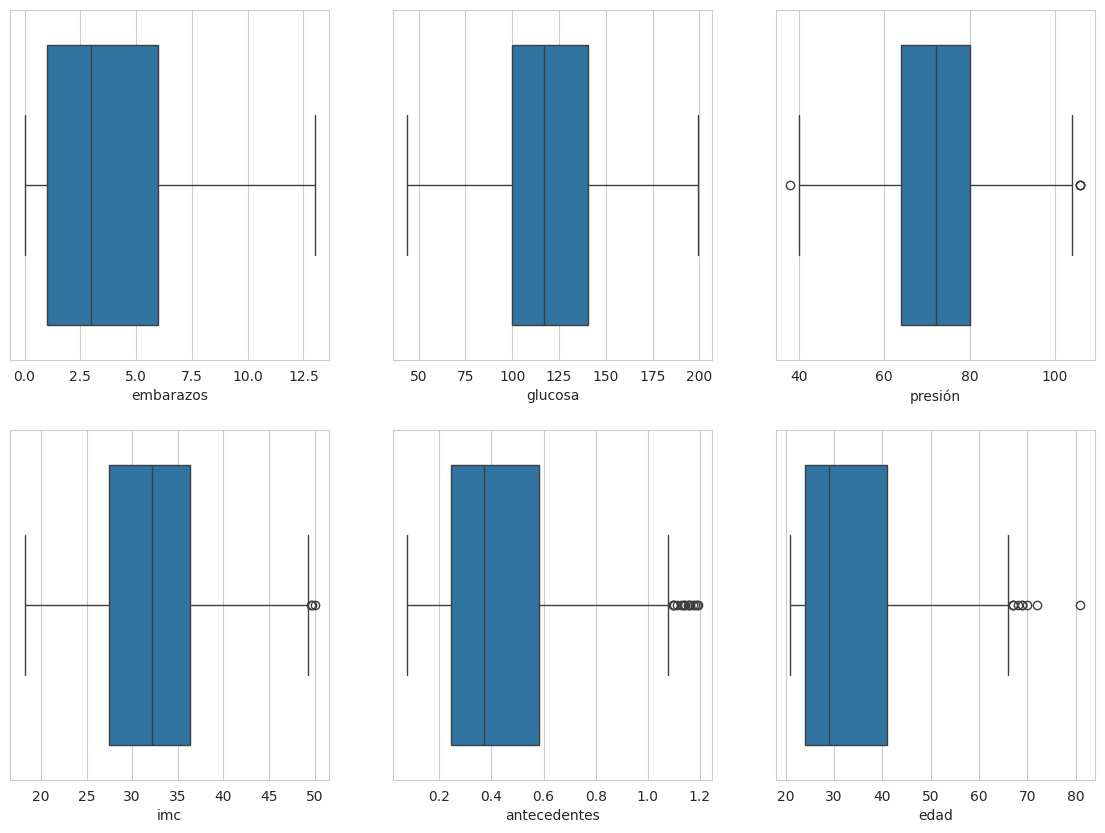

In [ ]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='embarazos',data=df_diabetes)
plt.subplot(2,3,2)
sns.boxplot(x='glucosa',data=df_diabetes)
plt.subplot(2,3,3)
sns.boxplot(x='presión',data=df_diabetes)
plt.subplot(2,3,4)
sns.boxplot(x='imc',data=df_diabetes)
plt.subplot(2,3,5)
sns.boxplot(x='antecedentes',data=df_diabetes)
plt.subplot(2,3,6)
sns.boxplot(x='edad',data=df_diabetes)

***Características numéricas (tras la visulización de las gráficas)***  

* embarazos:
  * Algunas mujeres de la muestra tienen muchos hijos (12 o más), aunque la mayoría tienen pocos, lo normal es tener solo 1 hijo.
  * Parece que en la gráfica de esta categoría debería haber una distribución sesgada hacia la derecha y achatada (alrededor de 3 aproximadamente).  
  * Dispersión de datos alta.
  * Los outliers que han sido totalmente eliminados del dataset.

* glucosa:  
  * Algunas mujeres padecen una hipoglucemia muy grave (44) y algunas otras padecen prediabetes (199), aunque la mayoría tiene un ínice glucémico normal (100 a 120).
  * Parece que en la gráfica de esta categoría debería haber una distribución sesgada hacia la derecha y achatada (alrededor de 117 aproximadamente).  
  * Dispersión de datos baja.
  * Los outliers que han sido totalmente eliminados del dataset.  

* presión:    
  * La presión arterial diastólica normal ronda 70, lo cual indica una ligera hipotensión, aunque dentro del rango correcto.
  * Algunas mujeres padecen una hipotensión muy grave y algunas otras padecen hipertensión.
  * La presión diastólica se distribuye muy bien en torno al promedio y a la mediana y parece corresponderse a una población ligéramente hipotensa (72).
  * Parece que en la gráfica de esta categoría debería haber una distribución algo sesgada hacia la derecha y puntiaguda (alrededor de 72 aproximadamente).  
  * Dispersión de datos baja.
  * Los outliers que han quedado son totalmente tolerables.  

* imc:  
  * Parece que estas mujeres son, en general, obesas (tipo I) y en algunos casos podrían padecer, incluso, obesidad mórbida (tipo III).
  * Parece que hay una distribución gausiana, ligeramente sesgada a la derecha, en torno a 32, por lo tanto no debe haber mucho sesgo.  
  * Parece que la gráfica de esta categoría debería ser achatada (alrededor de 32 aproximadamente).  
  * Dispersión de datos baja.
  * Los outliers que han quedado son totalmente tolerables.

* antecedentes:   
  * La mayoría de las mujeres parecen tener pocos antecedentes de 0.4, pero no hay ninguna sin antecedentes.
  * Parece que en la gráfica de esta categoría debería haber una distribución algo sesgada hacia la derecha y muy puntiaguda (alrededor de 0.4 aproximadamente).  
  * Dispersión de datos media.
  * Los outliers que han quedado son tolerables.

* edad:     
  * Las mujeres de la muestra tienen entre 20 y 80 años, aproximadamente.  
  * La edad más repetida es de 22 años, lo cual indica que la mayoría de las mujeres están en su edad fértil.
  * La población es, en definitiva, relatívamente joven.
  * Parece que en la gráfica de esta categoría debería haber una distribución sesgada hacia la derecha y ligeramente puntiaguda (alrededor de 29 años aproximadamente).  
  * Dispersión de datos media.
  * Los outliers que han quedado son tolerables.  


***Coclusiones***

* Hemos eliminado las características con un % de outliers excesivo (>20%), debido a que no pueden aportar información fiable.
* Hemos eliminado o reducido el % de outliers a niveles aceptables, de las demás características.
* Las predicciones numéricas coinciden con las gráficas obtenidas.
* ***Necesitamos obtener conclusiones cruzando variables***.

***Exploración de la variable target***

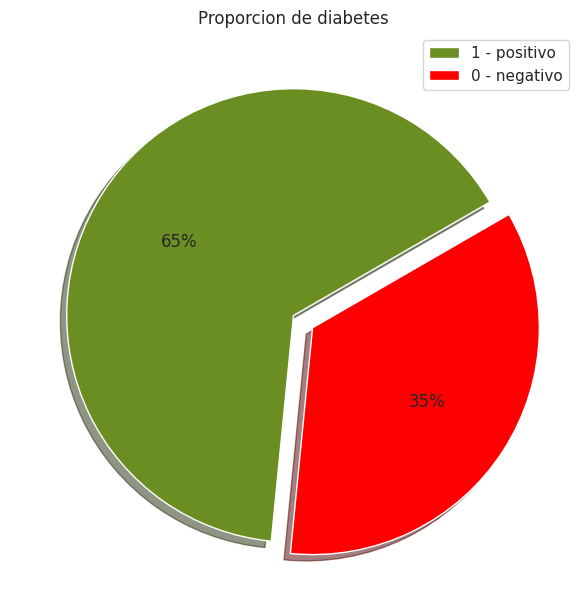

diabetes
0    500
1    268
Name: count, dtype: int64


In [ ]:
# Proporción de la variable target
plt.figure(figsize=(7,7))

labels,counts = np.unique(df_diabetes.diabetes, return_counts=True)
explode = (0, 0.1)
plt.pie(counts, autopct='%1.0f%%', explode=explode, colors=['olivedrab', 'red'], shadow=True, startangle=30)
plt.title('Proporcion de diabetes')
plt.legend({'0 - negativo','1 - positivo'})

plt.show()

print(df_diabetes.diabetes.value_counts())

***Una prevalencia, en una población femenina, del 35% es más del doble de los niveles normales***.

***Análisis bivariable***

***Importante***: Que dos sucesos o fenómenos estén relacionadas entre sí no significa que uno sea la causa del otro, por ejemplo, el gallo canta poco antes del amanecer. Pero el canto del gallo no es la causa de que salga el sol. No es la primera vez que acabamos de lavar el coche y se pone a llover, pero para que llueva, no debemos labar el coche.

***Correlación no implica causalidad***, por lo tanto, debemos tener un contexto ([reglas de negocio](https://github.com/ddasilva64/DECTRE24001esp/tree/master/slides%20y%20notas/reglas-negocio.md)) que nos ayude a valorar las posibles relaciones.

In [ ]:
# Matriz de los coeficientes de correlación de Pearson
print('Matriz de los coeficientes de correlación de Pearson')
df_diabetes.corr()

Matriz de los coeficientes de correlación de Pearson


,embarazos,glucosa,presión,imc,antecedentes,edad,diabetes
embarazos,1.000000,0.118320,0.208769,0.029185,0.002894,0.544957,0.204242
glucosa,0.118320,1.000000,0.204070,0.228281,0.085419,0.266533,0.492928
presión,0.208769,0.204070,1.000000,0.272026,0.022154,0.322894,0.165148
imc,0.029185,0.228281,0.272026,1.000000,0.125607,0.049566,0.300736
antecedentes,0.002894,0.085419,0.022154,0.125607,1.000000,0.050651,0.156561
edad,0.544957,0.266533,0.322894,0.049566,0.050651,1.000000,0.238356
diabetes,0.204242,0.492928,0.165148,0.300736,0.156561,0.238356,1.000000


Interpretación de la matriz de Pearson a través de un heatmap


[Text(0.5, 35.24999999999996, 'variables en eje X'),
 Text(61.25, 0.5, 'variavles en eje Y')]

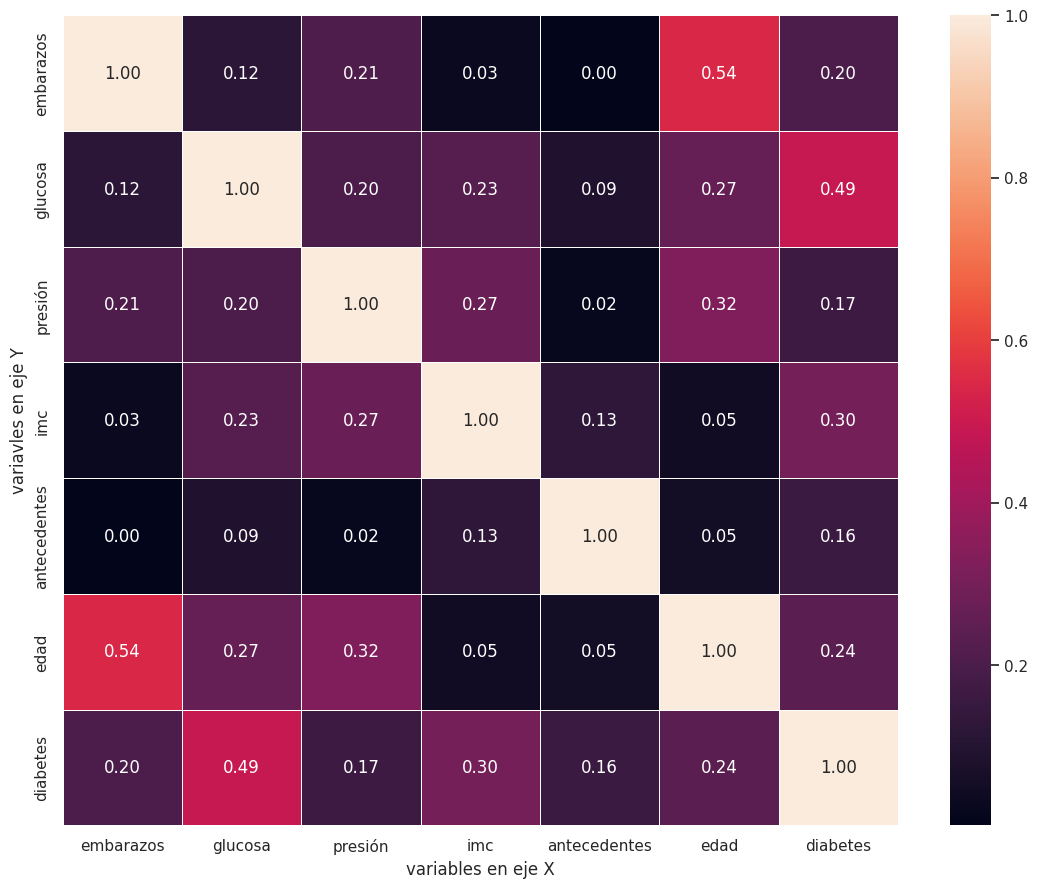

In [ ]:
# Interpretación de la matriz de Pearson a través de un heatmap
print('Interpretación de la matriz de Pearson a través de un heatmap')
plt.figure(figsize = (12,10))
ax = sns.heatmap(df_diabetes.corr(), annot =True, fmt=".2f", linewidth=.5)
ax.set(xlabel="variables en eje X", ylabel="variavles en eje Y")

***Nota***: Para que un mapa de calor funcione correctamente, los datos ya deben estar en forma de matriz, la función de sns.heatmap básicamente los colorea.

Si excluimos la relación de las variables consigo mismas (diagonal de unos), vemos que están muy relacionadas:
* ***embarazos*** y ***edad*** (0.54): Obviamente, con la edad se reduce la probabilidad de embarazos, pero no podemos extrapolar esa relación con la diabetes.  

* ***diabetes*** y ***glucosa*** (0.49): [Ver reglas de negocio](https://github.com/ddasilva64/DECTRE24001esp/tree/master/slides%20y%20notas/reglas-negocio.md).  

* ***diabetes*** y ***imc*** (0.29): [Ver reglas de negocio](https://github.com/ddasilva64/DECTRE24001esp/tree/master/slides%20y%20notas/reglas-negocio.md).  

* ***diabetes*** y ***edad*** (0.24): [Ver reglas de negocio](https://github.com/ddasilva64/DECTRE24001esp/tree/master/slides%20y%20notas/reglas-negocio.md).  

* ***presión*** y ***edad*** (0.27): [Ver reglas de negocio](https://github.com/ddasilva64/DECTRE24001esp/tree/master/slides%20y%20notas/reglas-negocio.md).  

* ***glucosa*** y ***edad*** (0.31): [Ver reglas de negocio](https://github.com/ddasilva64/DECTRE24001esp/tree/master/slides%20y%20notas/reglas-negocio.md).  

* ***presión*** e ***imc*** (0.25): Es significativa, pero no podemos extrapolar esa relación con la diabetes.  

* ***glucosa*** e ***imc*** (0.22): Es significativa, pero no podemos extrapolar esa relación con la diabetes.   

* ***glucosa*** e ***presión*** (0.21): Es significativa, pero no podemos extrapolar esa relación con la diabetes.  

En nuestro estudio, parece que extraemos, de momento que glucosa, imc y edad, están muy relacionadas con la diabetes.

Los antecedentes, que en las [reglas de negocio](https://github.com/ddasilva64/DECTRE24001esp/tree/master/slides%20y%20notas/reglas-negocio.md) están muy relacionadas, en nuestro modelo, no parecen estarlo. Podría ser que fuese porque és el resultado de una función.


Los gráficos de dispersión respecto a diabetes son:



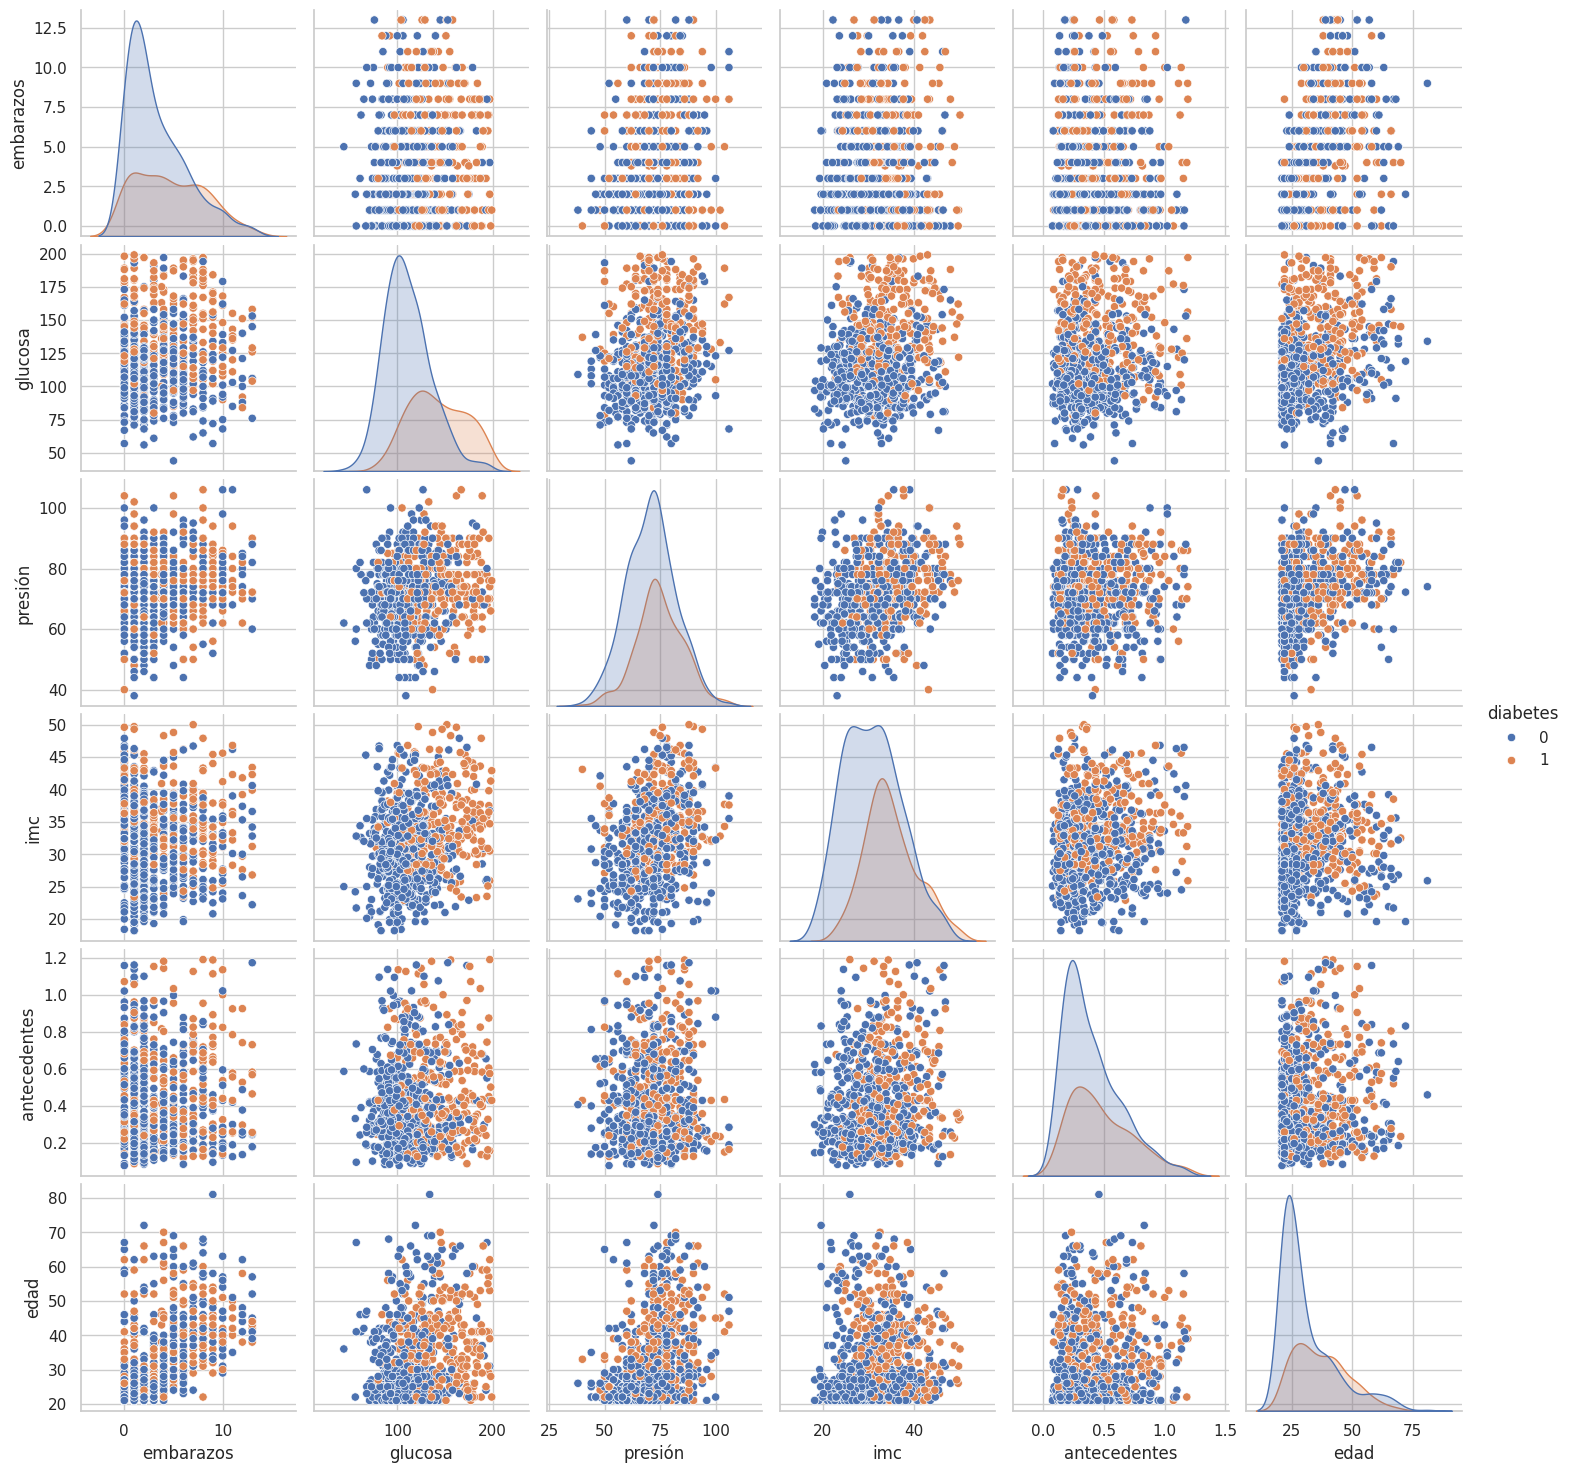

In [ ]:
# Gráficos de dispersión
print("Los gráficos de dispersión respecto a diabetes son:\n")
sns.pairplot(df_diabetes,hue='diabetes')

Como el ***gráfico de dispersión*** muestra posibles relaciones entre múltiples variables, examinando todas las combinaciones de dos en dos, ***los resultados obtenidos deben coincidir con el análisis detallado que haremos posteriormente***. Además, se puede observar la incidencia de la diabetes, sobre la variable individual.

***Combinaciones posibles de variables con la variable target (diabetes)***

| número | relación               | índice de Pearson | valoración índice  | aplica a nuestro dataset  |
| :----: | :----------------      | :---------------: | :---------------:  | :---------------:         |
| 1      | embarazos-diabetes     | 0.20              | poca correlación   |no                        |
| 2      | glucosa-diabetes       | 0.54              | correlación alta   |sí                        |
| 3      | presión-diabetes       | 0.17              | poca correlación   |sí                        |
| 4      | imc-diabetes           | 0.30              | poca correlación   |sí                        |
| 5      | antecedentes-diabetes  | 0.16              | poca correlación   |sí                        |
| 6      | edad-diabetes          | 0.24              | poca correlación   |sí                        |

No podemos valorar la diabetes gestacional, nos faltan características en el dataset.  



En adelante:

***Pearson***  
* 1: 0.1 < 0.3	poca correlación
* 2: 0.3 < 0.5	correlación media
* 3: 0.5 < 0.7	correlación alta
* 4: 0.7 < 1	  correlación muy alta

***Outliers***
* 1: sin outliers
* 2: outliers muy aceptables
* 3: outliers aceptables
* 4: outliers aceptables

Caso 2 (glucosa-diabetes)

#02 glucosa vs diabetes


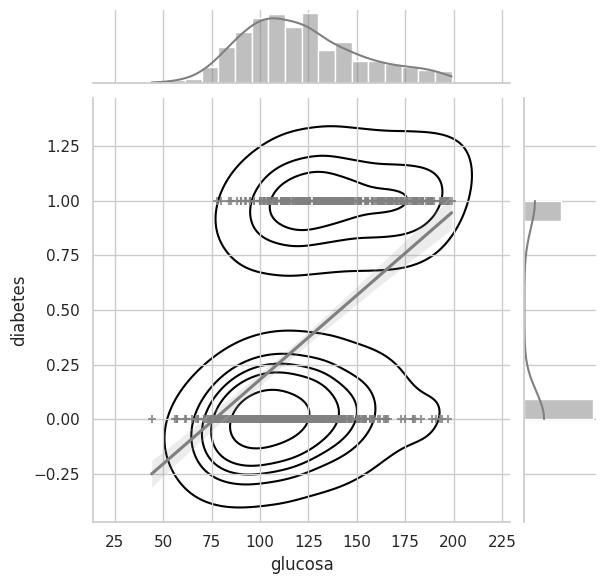

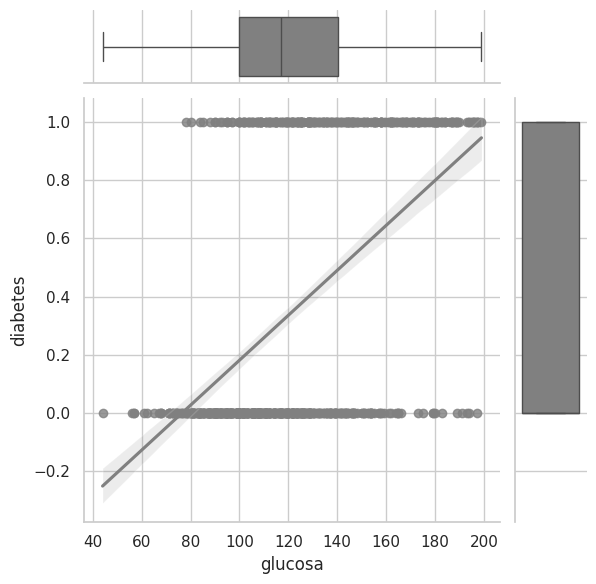

In [ ]:
# Graficas de la combinación 02: glucosa-diabetes

print("#02 glucosa vs diabetes")

ag = sns.jointplot(data = df_diabetes,
              x = 'glucosa',
              y = 'diabetes',
              kind = 'reg',
              color = 'grey',
              marker="+")

ag.plot_joint(sns.kdeplot,
              color="black",
              zorder=0,
              levels=6)


bg = sns.JointGrid(data=df_diabetes, x="glucosa", y="diabetes")
bg.plot(sns.regplot, sns.boxplot,color = 'grey')

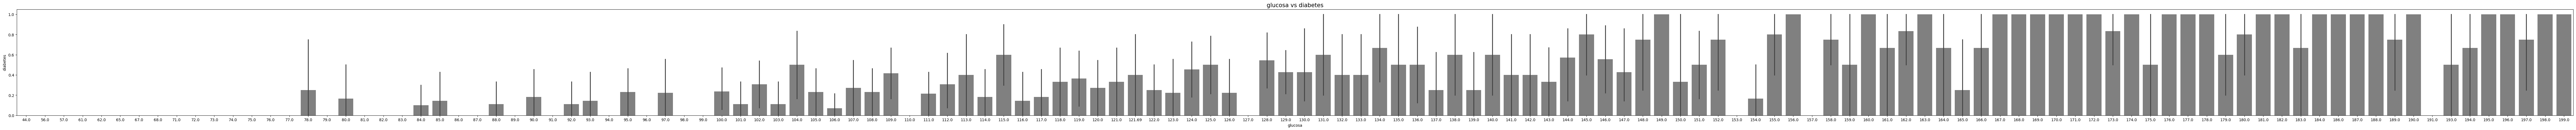

In [ ]:
plt.style.use("default")
plt.figure(figsize=(120,5))
sns.barplot(x="glucosa", y="diabetes", data=df_diabetes, color='grey')
plt.title("glucosa vs diabetes",fontsize=15)
plt.xlabel("glucosa")
plt.ylabel("diabetes")
plt.show()

|        |glucosa-diabetes|
|:------:|:--------------:|
|Pearson |3               |
|Outliers|1               |
|Diabetes|>131            |

Caso 3 (presión-diabetes)

#03 presión vs diabetes


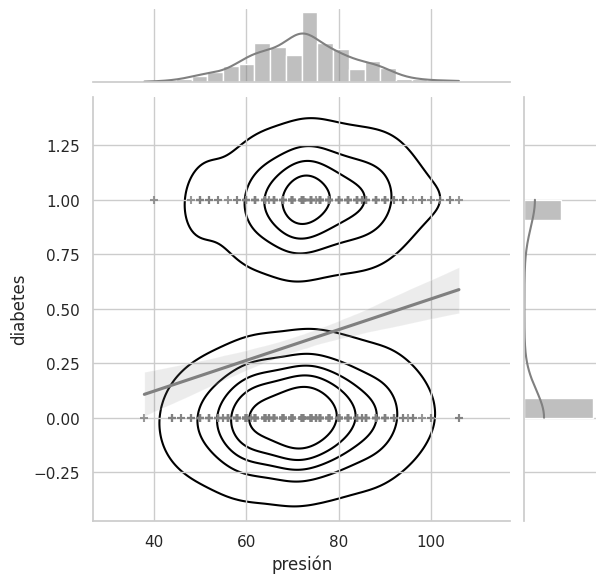

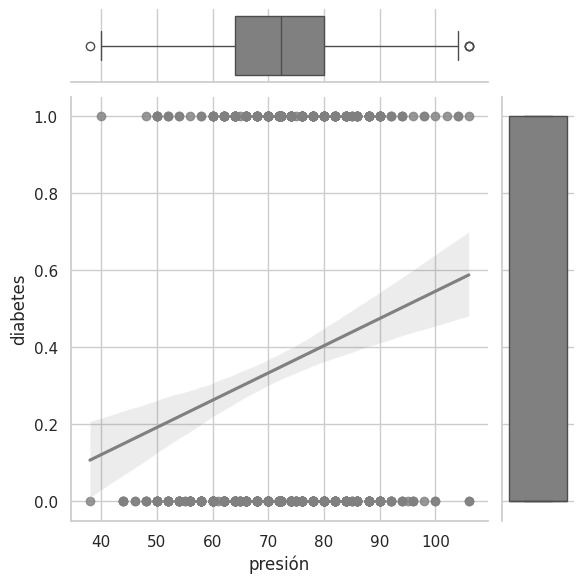

In [ ]:
# Graficas de la combinación 03: presión-diabetes

print("#03 presión vs diabetes")

ag = sns.jointplot(data = df_diabetes,
              x = 'presión',
              y = 'diabetes',
              kind = 'reg',
              color = 'grey',
              marker="+")

ag.plot_joint(sns.kdeplot,
              color="black",
              zorder=0,
              levels=6)


bg = sns.JointGrid(data=df_diabetes, x="presión", y="diabetes")
bg.plot(sns.regplot, sns.boxplot,color = 'grey')

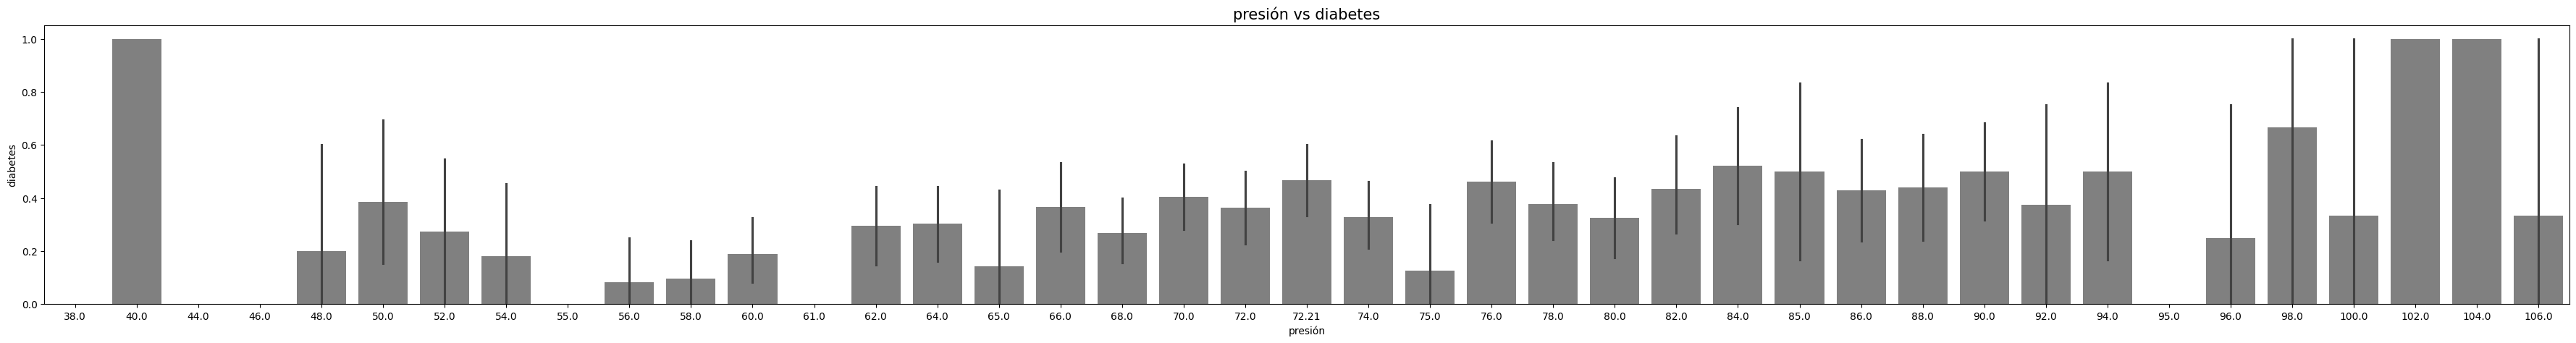

In [ ]:
plt.style.use("default")
plt.figure(figsize=(45,5))
sns.barplot(x="presión", y="diabetes", data=df_diabetes, color='gray')
plt.title("presión vs diabetes",fontsize=15)
plt.xlabel("presión")
plt.ylabel("diabetes")
plt.show()

|        |presión-diabetes|
|:------:|:--------------:|
|Pearson |1               |
|Outliers|2               |
|Diabetes|40 y >98        |

Caso 4 (imc-diabetes)

#04 imc vs diabetes


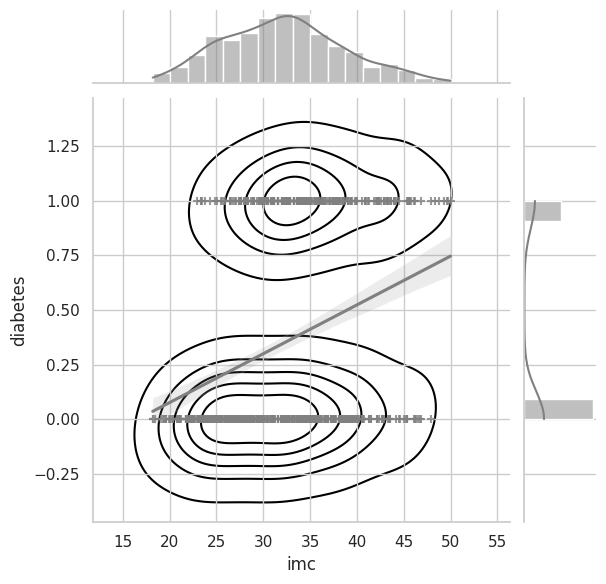

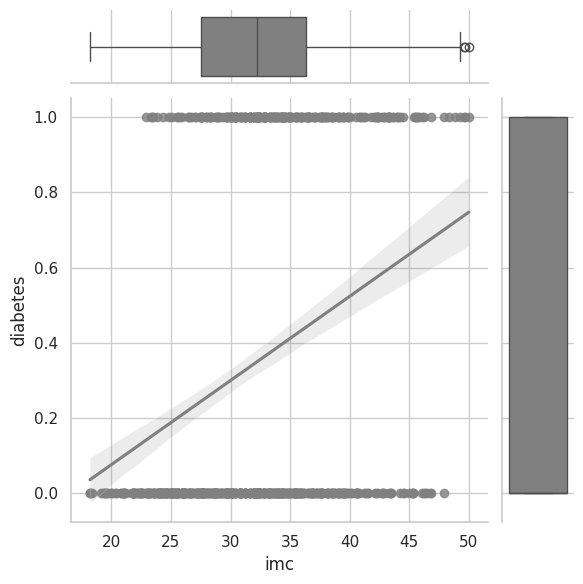

In [ ]:
# Graficas de la combinación 04: imc-diabetes

print("#04 imc vs diabetes")

ag = sns.jointplot(data = df_diabetes,
              x = 'imc',
              y = 'diabetes',
              kind = 'reg',
              color = 'grey',
              marker="+")

ag.plot_joint(sns.kdeplot,
              color="black",
              zorder=0,
              levels=6)


bg = sns.JointGrid(data=df_diabetes, x="imc", y="diabetes")
bg.plot(sns.regplot, sns.boxplot,color = 'grey')

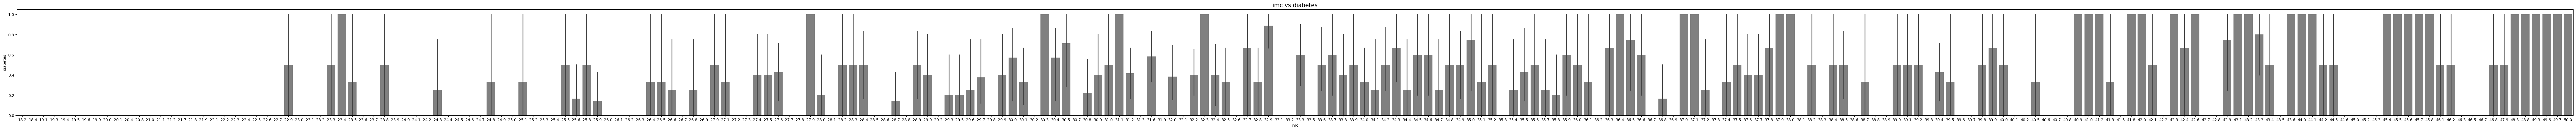

In [ ]:
plt.style.use("default")
plt.figure(figsize=(120,5))
sns.barplot(x="imc", y="diabetes", data=df_diabetes, color='grey')
plt.title("imc vs diabetes",fontsize=15)
plt.xlabel("imc")
plt.ylabel("diabetes")
plt.show()

|        |imc-diabetes|
|:------:|:--------------:|
|Pearson |1               |
|Outliers|2               |
|Diabetes|>22.9           |

Caso 5 (antecedentes-diabetes)

#05 antecedentes vs diabetes


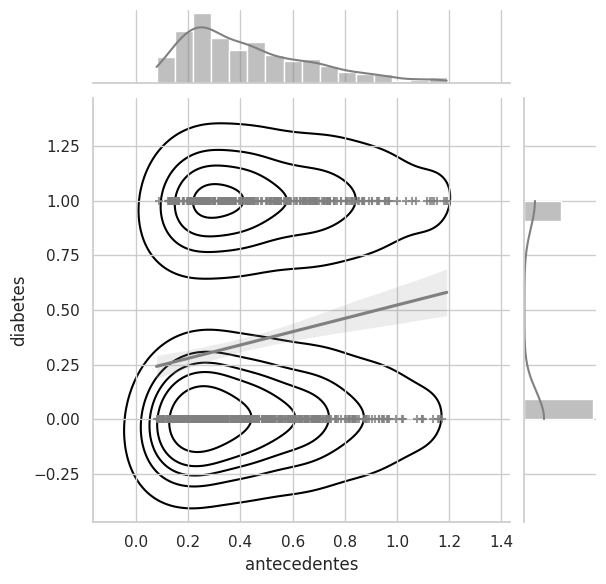

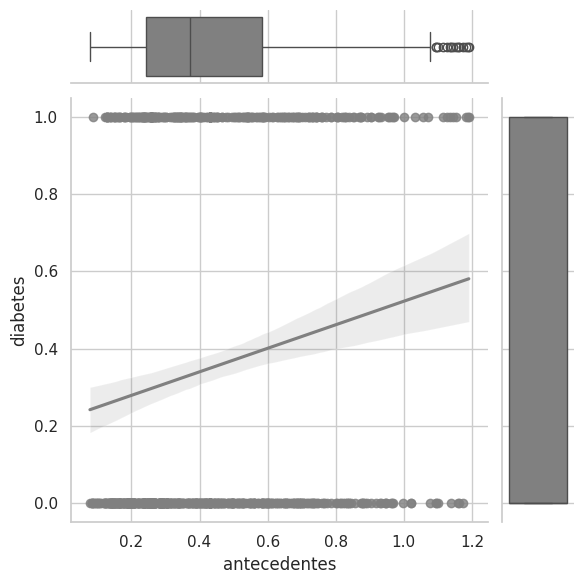

In [ ]:
# Graficas de la combinación 05: antecedentes-diabetes

print("#05 antecedentes vs diabetes")

ag = sns.jointplot(data = df_diabetes,
              x = 'antecedentes',
              y = 'diabetes',
              kind = 'reg',
              color = 'grey',
              marker="+")

ag.plot_joint(sns.kdeplot,
              color="black",
              zorder=0,
              levels=6)


bg = sns.JointGrid(data=df_diabetes, x="antecedentes", y="diabetes")
bg.plot(sns.regplot, sns.boxplot,color = 'grey')

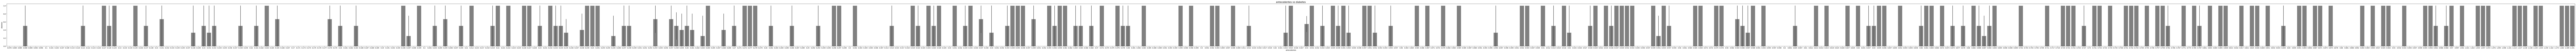

In [ ]:
plt.style.use("default")
plt.figure(figsize=(300,5))
sns.barplot(x="antecedentes", y="diabetes", data=df_diabetes, color='grey')
plt.title("antecedentes vs diabetes",fontsize=15)
plt.xlabel("antecedentes")
plt.ylabel("diabetes")
plt.show()

|        |antecedentes-diabetes|
|:------:|:--------------:|
|Pearson |1               |
|Outliers|3               |
|Diabetes|>0.09           |

Caso 6 (edad-diabetes)

#06 edad vs diabetes


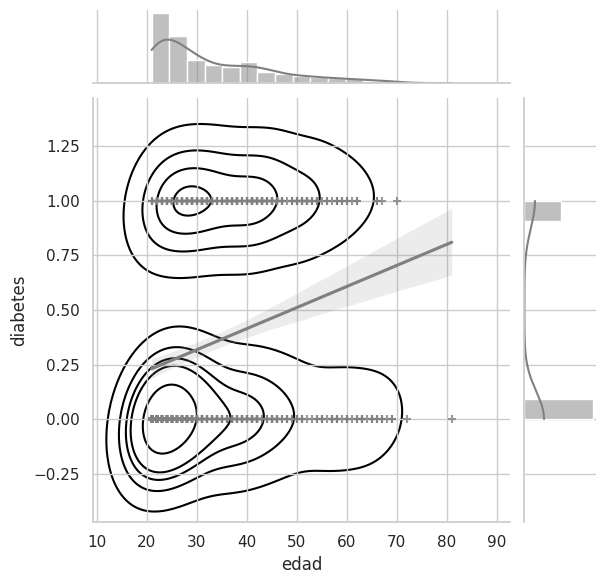

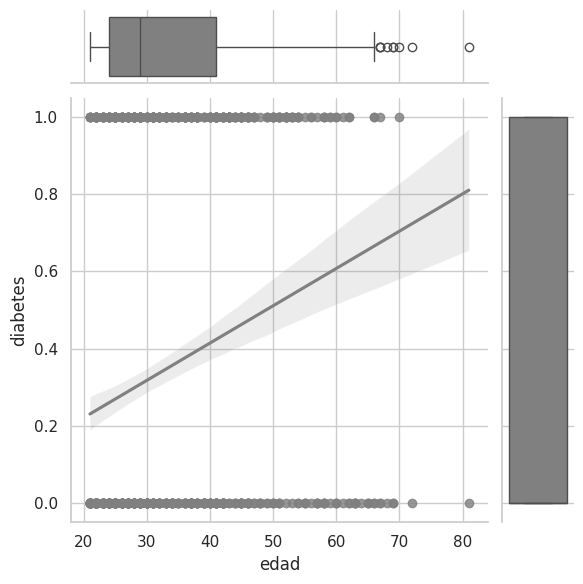

In [ ]:
# Graficas de la combinación 06: edad-diabetes

print("#06 edad vs diabetes")

ag = sns.jointplot(data = df_diabetes,
              x = 'edad',
              y = 'diabetes',
              kind = 'reg',
              color = 'grey',
              marker="+")

ag.plot_joint(sns.kdeplot,
              color="black",
              zorder=0,
              levels=6)


bg = sns.JointGrid(data=df_diabetes, x="edad", y="diabetes")
bg.plot(sns.regplot, sns.boxplot,color = 'grey')

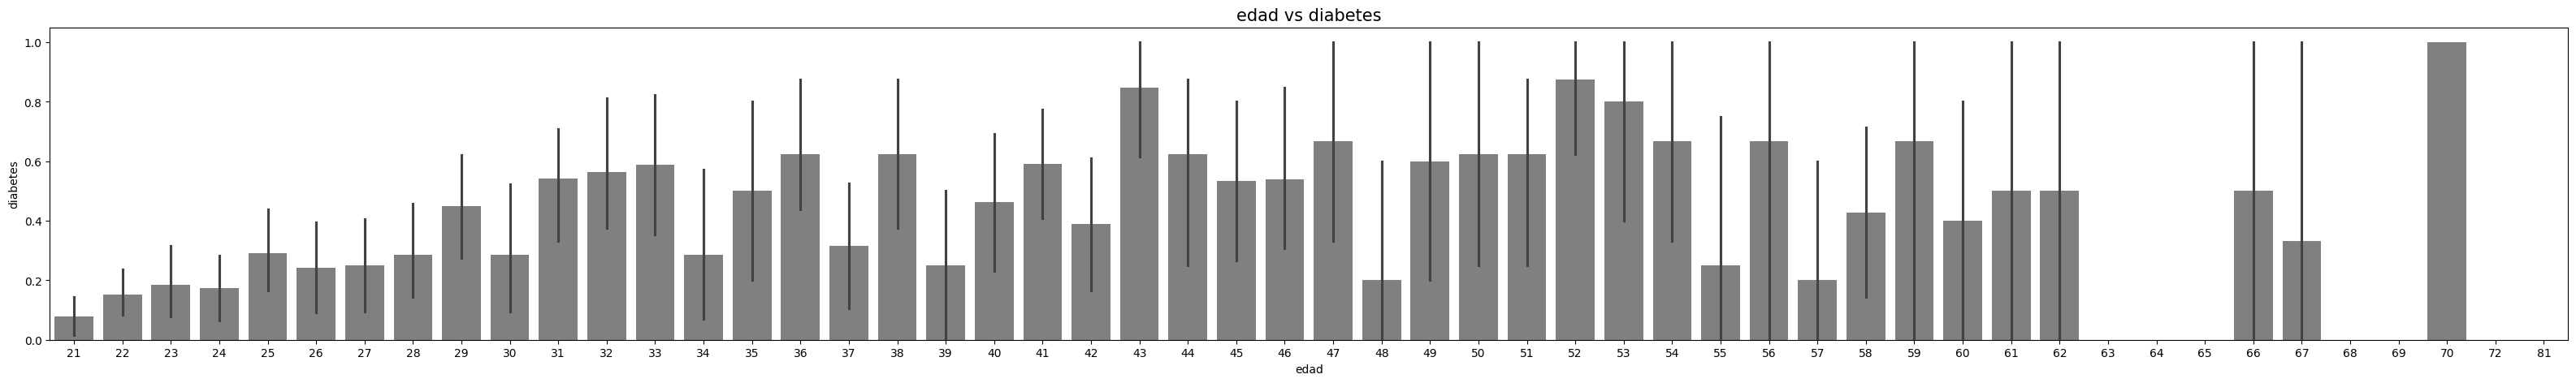

In [ ]:
plt.style.use("default")
plt.figure(figsize=(40,5))
sns.barplot(x="edad", y="diabetes", data=df_diabetes, color='grey')
plt.title("edad vs diabetes",fontsize=15)
plt.xlabel("edad")
plt.ylabel("diabetes")
plt.show()

|        |antecedentes-diabetes|
|:------:|:--------------:|
|Pearson |1               |
|Outliers|3               |
|Diabetes|>43             |

***Resumen de las combinaciones posibles de variables***

| número | relación               | Pearson | Outliers | Valor aprox. diabetes |
| :----: | :----------------      | :-----: | :------: | :-------------------: |
| 2      | glucosa-diabetes       | 3       | 1        | >131     |
| 3      | presión-diabetes       | 1       | 2        | 40 y >98 |
| 4      | imc-diabetes           | 1       | 2        | >22.9    |
| 5      | antecedentes-diabetes  | 1       | 3        | >0.09    |
| 6      | edad-diabetes          | 1       | 2        | >43      |








La visión, hasta este punto, de las características del modelo revela que:  

* ***glucosa***: Parece que con valores de glucosa > 131, ya tenemos casos de diabetes, es decir, se producen casos de diabetes antes de lo esperado.

* ***presión***: Parece que con valores de presión arterial diastólica > 98, ya tenemos casos de diabetes, es decir, se producen casos de diabetes con una ligerísma presión alta, antes de lo esperado.  

* ***imc***: Parece que con valores de índice de masa corporal (IMC) > 22.9, ya tenemos casos de diabetes, es decir, se producen casos de diabetes antes de lo esperado.

* ***antecedentes***: Parece que con valores de antecedentes > 0.09 (muy bajo), ya tenemos casos de diabetes, es decir, parece que hay una prevalencia altísima en esta población de antecedentes de diabetes, lo cual, podría explicar que la diabetes aparezca, antes de lo esperado, con las demás características.

* ***edad***: Parece que con valores de edad > 43, ya tenemos casos de diabetes, es decir, se producen casos de diabetes antes de lo esperado.

El nivel de outliers es aceptable en todos los casos.  

Parece que este análisis bivariable nos ha revelado la enorme importancia de los antecedentes familiares, para padecer diabetes.

## ***Modelado***

In [ ]:
# Antes de dividir el conjunto de datos, necesitamos transformar los datos en cuantiles

q  = QuantileTransformer()
X = q.fit_transform(df_diabetes)

df_transformado = q.transform(X)
df_transformado = pd.DataFrame(X)

In [ ]:
# Formato de columnas

# Array de nombres de columnas
df_columns = np.array(['embarazos','glucosa', 'presión', 'imc', 'antecedentes', 'edad', 'diabetes'])

# Asignación del array de nombres de columnas
df_transformado.columns = df_columns

# Visualizamos las columnas definidas del df
print('Columnas del df transformado: ', df_diabetes.columns)

Columnas del df transformado:  Index(['embarazos', 'glucosa', 'presión', 'imc', 'antecedentes', 'edad',
       'diabetes'],
      dtype='object')


In [ ]:
# Visualizamos el df_transformado
df_transformado.head()

,embarazos,glucosa,presión,imc,antecedentes,edad,diabetes
0,0.752934,0.810300,0.467405,0.601695,0.788787,0.889831,1.0
1,0.232725,0.091265,0.286832,0.213168,0.475880,0.558670,0.0
2,0.868970,0.956975,0.229465,0.077575,0.820078,0.585398,1.0
3,0.232725,0.124511,0.286832,0.284224,0.106258,0.000000,0.0
4,0.000000,0.721643,0.001304,0.937419,0.588005,0.606258,1.0


## ***División de datos***

In [ ]:
# Separación de datos en X e y (target & predictor variables)
#   X_diabetes = características del modelo
#   y_diabetes = etiqueta
X_diabetes = df_diabetes.drop('diabetes',axis=1)
y_diabetes = df_diabetes.diabetes

## ***Training***

In [ ]:
# 80% para training y 20% para test
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes,y_diabetes, test_size=.20, random_state=42)
X_train_diabetes.shape,y_train_diabetes.shape

((614, 6), (614,))

500+268=768; 768*0,8=614  
categorías = 6 => shape = (614,6)  
variable target = 1 => shape = (614,)  

In [ ]:
print('Filas de entrenamiento:',len(X_train_diabetes))
print('Filas de test         :',len(X_test_diabetes))

Filas de entrenamiento: 614
Filas de test         : 154


## ***Optimización de hiperparámetros***

In [ ]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train_diabetes, y_train_diabetes)
print("Precisión en el conjunto de entrenamiento: {:.3f}".format(rf1.score(X_train_diabetes, y_train_diabetes)))
print("Precisión en el equipo de prueba         : {:.3f}".format(rf1.score(X_test_diabetes, y_test_diabetes)))

Precisión en el conjunto de entrenamiento: 0.792
Precisión en el equipo de prueba         : 0.773


In [ ]:
# Instancia del modelo
rfc_diabetes = RandomForestClassifier(random_state=42)

# Definición de hiperparámetros
param_grid = {
    'n_estimators': [10,25,50],
    'max_depth' : [5,10,15],
    'criterion' : ['mse', 'mae', 'gini', 'entropy', 'log_loss'],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1,2,4],
}

# Crear el objeto GridSearchCV (validación cruzada)
grid_search = GridSearchCV(estimator=rfc_diabetes, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con GridSearchCV
grid_search.fit(X_train_diabetes, y_train_diabetes)

# Obtener el modelo con el mejor rendimiento
best_model_diabetes = grid_search.best_estimator_

# Mejores hiperparámetros del modelo
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 25}

## ***Evalución modelo***

In [ ]:
# Precisión del modelo
from sklearn.metrics import accuracy_score, classification_report
y_train_pred_diabetes = best_model_diabetes.predict(X_train_diabetes)
y_test_pred_diabetes = best_model_diabetes.predict(X_test_diabetes)

accuracy_train_diabetes = accuracy_score(y_train_diabetes,y_train_pred_diabetes)
accuracy_test_diabetes = accuracy_score(y_test_diabetes,y_test_pred_diabetes)
print(accuracy_train_diabetes)
print(accuracy_test_diabetes)

0.9771986970684039
0.7857142857142857


Tenemos ***overfitting***, debido a que nuestro dataset es muy pequeño y debemos ajustar el número de estimadores.  

Modificamos los hiperparàmetros hasta encontrar una combinación sin ***overfitting***.

In [ ]:
# Instancia del modelo
rfc_diabetes = RandomForestClassifier(random_state=42)

# Definición de hiperparámetros
param_grid = {
    'n_estimators': [100],
    'max_depth' : [3],
    'criterion' : ['mse', 'mae', 'gini', 'entropy', 'log_loss'],
    'min_samples_split': [4],
    'min_samples_leaf': [2],
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=rfc_diabetes, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con GridSearchCV
grid_search.fit(X_train_diabetes, y_train_diabetes)

# Obtener el modelo con el mejor rendimiento
best_model_diabetes = grid_search.best_estimator_

# Mejores hiperparámetros del modelo
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

In [ ]:
# Precisión del modelo
from sklearn.metrics import accuracy_score, classification_report
y_train_pred_diabetes = best_model_diabetes.predict(X_train_diabetes)
y_test_pred_diabetes = best_model_diabetes.predict(X_test_diabetes)

accuracy_train_diabetes = accuracy_score(y_train_diabetes,y_train_pred_diabetes)
accuracy_test_diabetes = accuracy_score(y_test_diabetes,y_test_pred_diabetes)
print(accuracy_train_diabetes)
print(accuracy_test_diabetes)

0.7833876221498371
0.7727272727272727


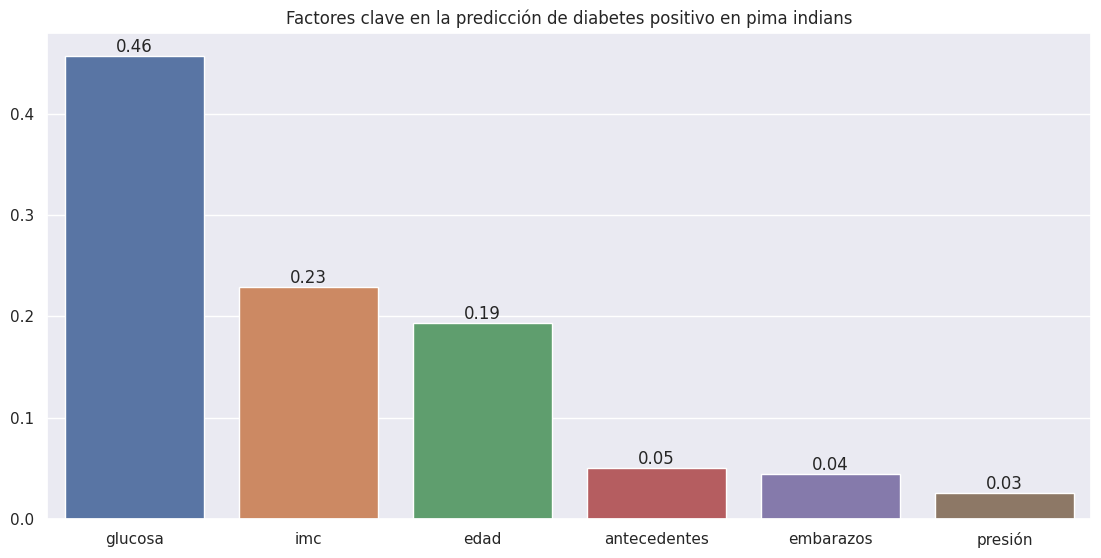

,0
glucosa,0.457435
imc,0.228741
edad,0.193487
antecedentes,0.050513
embarazos,0.044712
presión,0.025113


In [ ]:
# Representación de los factores clave en la predicción de diabetes positivo
feature_scores_diabetes = pd.DataFrame(pd.Series(best_model_diabetes.feature_importances_, index=X_train_diabetes.columns).sort_values(ascending=False)).T
plt.figure(figsize=(12,6))
sns.barplot(data=feature_scores_diabetes)

for index, value in enumerate(feature_scores_diabetes.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de diabetes positivo en los nativos pima")
plt.show()
pd.DataFrame(feature_scores_diabetes).T

Matriz de confusión




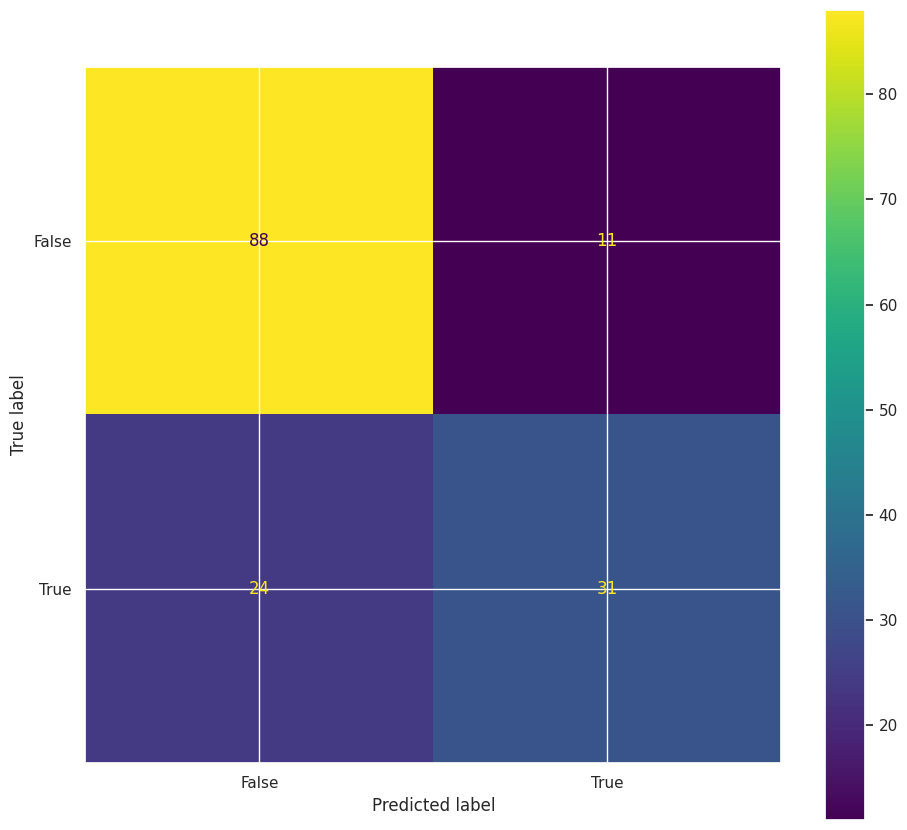

In [ ]:
# Crear la matriz de confusión
cm = metrics.confusion_matrix(y_test_diabetes, y_test_pred_diabetes)

# Crear la visualización de la matriz de confusión
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

# Mostrar la matriz de confusión
print('Matriz de confusión\n\n')
cm_display.plot()
plt.show()

***Interpretación***  

* Verdadero negativo (TN) = 88
* Falso positivo (FP) = 11  
* Falso negativo (FN) = 24  
* Verdadero positivo (TP) = 31  

* Verdadero => los valores se predijeron con precisión (88+31=119)  
* Falso     => ha habido un error o una predicción incorrecta (11+24=35)  

Ha habido un 100-35/119*100=70.59% de preción en la predicción

In [ ]:
# Informe de clasificación
print("Informe de clasificación (métricas)\n",classification_report(y_test_diabetes, y_test_pred_diabetes))

Informe de clasificación (métricas)
               precision    recall  f1-score   support

           0       0.79      0.89      0.83        99
           1       0.74      0.56      0.64        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154



***Interpretación de las métricas***:  
  
* precision (precisión o valor predictivo positivo): Proporción de instancias relevantes entre las instancias recuperadas. En otras palabras, responde a la pregunta "¿Qué proporción de identificaciones positivas ha sido realmente correcta?"  
  * promedio $=0.79$
  * diabetes $=\frac{TP}{TP+FP}=\frac{31}{31+11}=\frac{31}{42}=0.74$

* recall (sensibilidad o tasa de aciertos o tasa positiva real -TPR-): Proporción de la cantidad total de instancias pertinentes que se han recuperado realmente. Responde a la pregunta "¿Qué proporción de positivos reales se ha identificado correctamente?"  
  * promedio $=0.89$
  * diabetes $=\frac{TP}{TP+FN}=\frac{31}{31+24}=\frac{31}{55}=0.56$

* f1-score (puntuación F1): Es una medida de la precisión de una prueba, es la media armónica de precisión y recuperación. Puede tener una puntuación máxima de 1 (precisión y recuerdo perfectos) y una mínima de 0. En general, es una medida de la precisión y robustez de su modelo
  * promedio $=0.83$
  * diabetes $=\frac{2xprecisionxrecall}{precision+recall}=\frac{2x0.74x0.56}{0.74+0.56}=\frac{0.83}{1.30}=0.64$

* accuracy (exactitud): Proporción de predicciones que el modelo ha clasificado correctamente.  
  * promedio $=0.76$
  * diabetes $=\frac{nº de predicciones correctas}{nº de predicciones}=\frac{TP+TN}{TP+TN+FP+FN}=\frac{31+88}{31+88+11+24}=\frac{119}{154}=0.77$

El modelo identifica muy bien los casos casos de no diabetes y un poco peor los casos de diabetes. Es mejor, en un primer análisis diagnosticar una persona sana que una enferma, dado que un segundo examen acalarará si la predicción de diabetes es correcta.  

***Un diabético diagnosticado como sano y descartado, para un segundo examen, ¡sería un desastre!. ¡Por lo tanto, la predicción es correcta!***.  


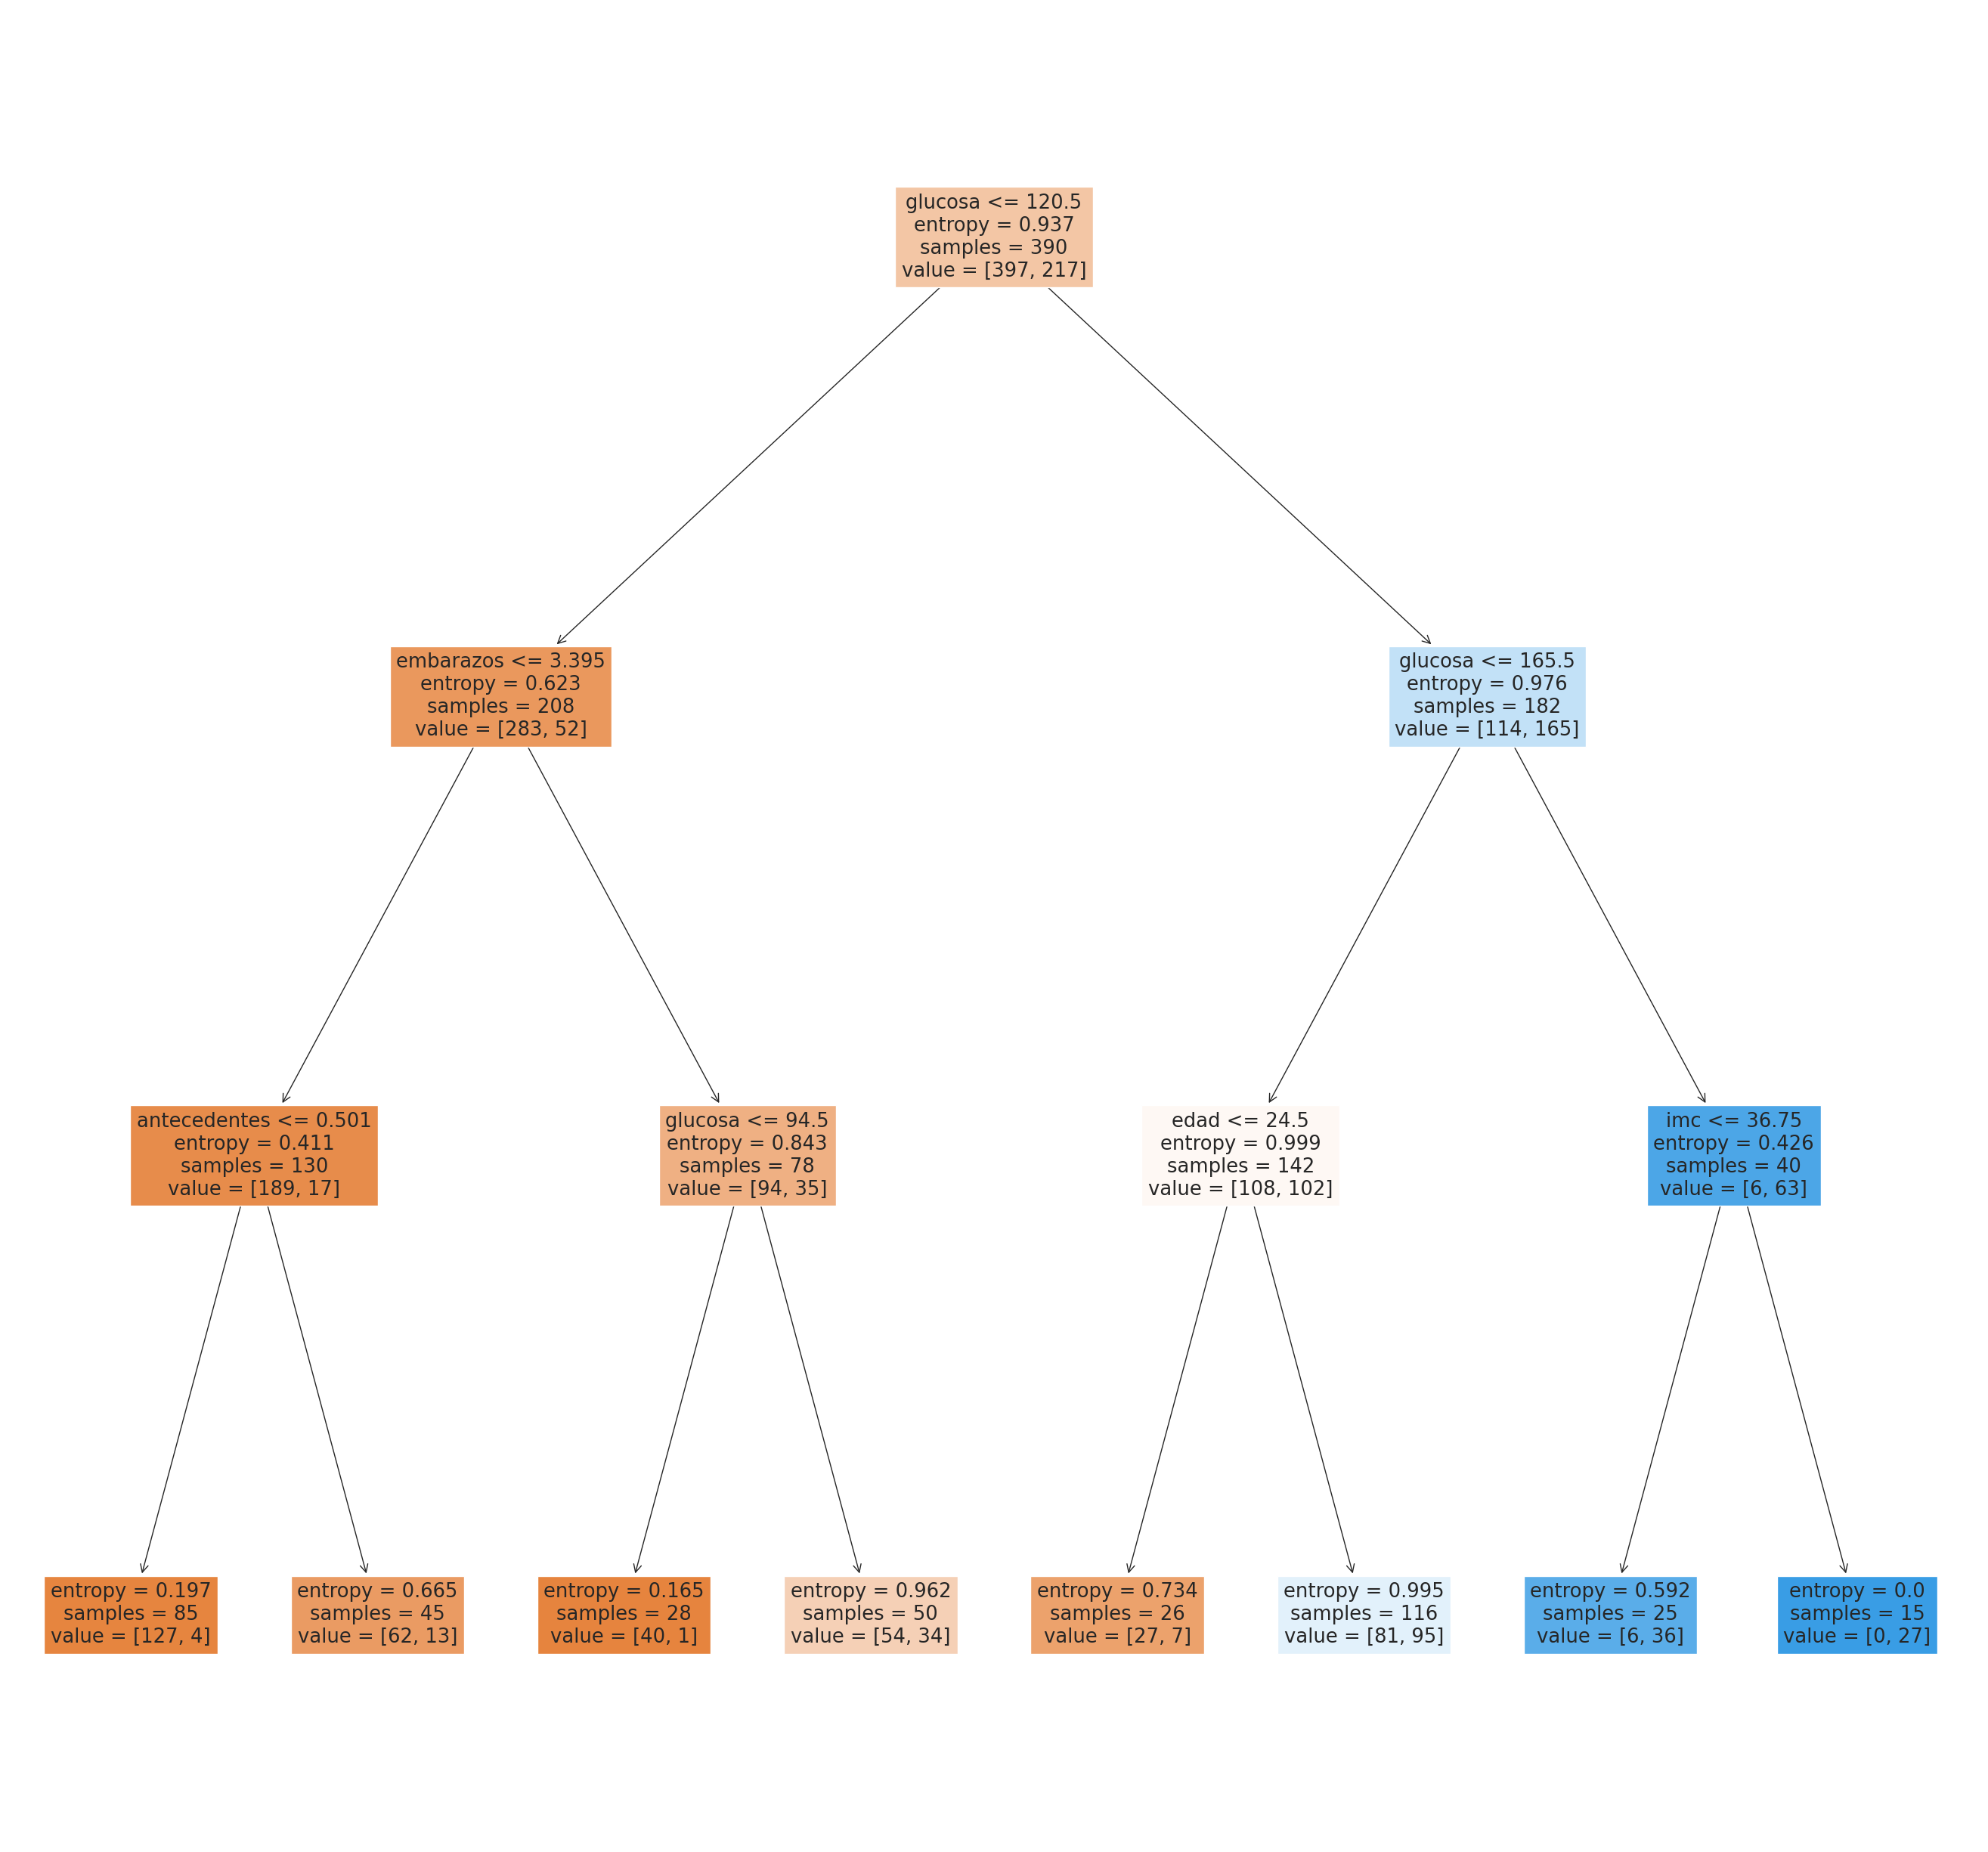

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(30, 30))

# Obtener un árbol aleatorio del Random Forest
tree_index = 0  # Índice del árbol deseado
Tree = best_model_diabetes.estimators_[tree_index]

# Visualizar el árbol utilizando plot_tree
tree.plot_tree(Tree, feature_names=X_train_diabetes.columns, filled=True)
plt.show()

Un análisis de las importancias de las características (***feature importances***) revela que las más influyentes para la predicción del modelo son:

* ***glucosa***: Con una importancia de 0.457435, se destaca como la característica más importante. Esto indica que ***la concentración de glucosa en plasma sanguíneo tiene un impacto muy significativo en la predicción de la diabetes***.

* ***imc***: El índice de masa corporal (IMC) es la segunda característica más relevante, con una importancia de 0.228741. Esto sugiere que ***el peso relativo a la altura también juega un papel crucial en la predicción de la diabetes***.

* ***edad***: La edad se posiciona como la tercera característica más importante, con una importancia de 0.050513. Esto indica que ***la edad de la paciente también contribuye significativamente a la predicción de la enfermedad***.

* ***antecedentes***: El valor de los antecedentes de diabetes familiar tiene una importancia de 0.044712. Aunque el valor es muy bajo, los datos que nos proporciona el dataset son resultado de una función que desconocemos (caja negra), con lo cual podría ser importante, pero mucho menos que los tres anteriores.

Las características restantes ***(embarazos y presión) tienen importancias relativamente más bajas*** en comparación con las anteriores, pero aún contribuyen al proceso de predicción. ***Insistimos en que faltan características para tratar la diabetes gestacional, así como otros tipos de diabetes, en nuestro modelo***.




***Conclusiones preliminares***:

1. ***No hay mujeres sin antecedentes de diabetes*** en la población (sea lo que sea que haga la función que nos da el factor que manejamos).
2. Si todas las mujeres tienen antecedentes de diabetes, ***debe existir algún factor de riesgo en esta población que no existe en otras poblaciones***.
3. ***No existen edades, recogidas en el dataset, que permitan inferir una esperanza de vida muy larga*** en esta población, es decir, no es un punto azul. Seguramente la esperanza de vida es de < 90 años en mujeres y menor, incluso, en hombres.
4. El IMC indica que la población analizada, tiene una ***tendencia muy alta a la obesidad*** (con algunos casos de obesidad mórbida).
5. La foto que expresa el dataset es de ***> 33% de incidencia de diabetes*** (tipo 2), en la población femenina. Es decir, podemos hablar de una ***epidemia de diabetes que se ha extendido generaciones hacia el pasado***.
6. Si la encuesta recoje el 100% de la población adulta femenina (de 21 a 81 años), y la moda es de 1 hijo por pareja, entonces ***la población total femenina es muy pequeña***, con lo cual, la población total debe ser también,  muy pequeña (menor de 3,000 personas, probablemente).
7. ***La tasa reproductiva promedio está solo ligéramente por encima de la tasa de reposición de la población***, con lo cual, podría existir una tendencia a la baja en esta y ***podría estar gestándose una crisis demográfica en esta población***.
8. ***Debe existir alguna característica (feature)*** en esta población, ***más importante que la edad***, entre los motivos para la enorme incidencia de la diabetes ***y que tiene que ver con el alto grado de obesidad, con toda seguridad***.

***Recomendaciones***:

1. ***Alimentación más sana*** (con un menor contenido calórico).
2. ***Ejercicio físico regular*** (idealmente diário).
3. ***Tratamiento clínico urgente de los casos de diabetes***, sea de prediabetes o diabetes (tipo 2).
4. ***Campañas que promueban la creación de parejas con personas que no sean de la etnia pima***, para prevenir la consanguineidad de la población.
5. ***Mejora de la sanidad*** en general y en especial de la ***geriátrica***.

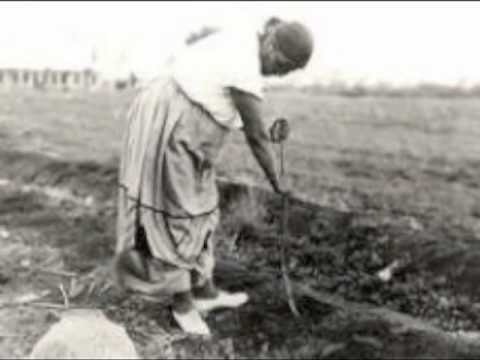

In [ ]:
# Vídeo de los indios Pima (inglés)
YouTubeVideo("pN4HqWRybwk")

***Evolución (hasta 2024) de la población nativa [Pima de Arizona (EEUU)](https://en.wikipedia.org/wiki/Akimel_O%27odham), para poder verificar las previsiones de nuestro RF***:

1. ***El dataset, [originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales de los EEUU](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database), es de*** 1984, ***hace exactamente 40 años***, con lo cual, ya podemos valorar la evolución de los datos.
2. ***Su alimentación tradicional se basaba, sobre todo, en la agricultura tradicional, la caza y la recolección***, lo cual exigía mucho ejercicio físico.
3. Los problemas de salud, en esta población, son básicamente de origen medioambiental relacionados con el ***declive de su economía y agricultura tradicionales***.
4. ***La sustitución de la dieta tradicional por una no autóctona, fueron los principales factores que contribuyeron a la alta tasa de diabetes entre los Pima***.
5. ***En el año 2000, la población que vivía en la comunidad era de 742 personas*** (menos de 1/3 que en 1984).
6. ***Tienen la prevalencia más alta de diabetes tipo 2 del mundo***, mucho más que la observada en otras poblaciones de los EEUU.

***La hipótesis del "[gen ahorrativo](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4418458/)" en los nativos Pima:***

* El aumento general de la prevalencia de diabetes es el resultado de la interacción de la ***predisposición genética y*** un ***cambio repentino en la dieta durante el último siglo, de cultivos agrícolas tradicionales a alimentos procesados, junto con una disminución de la actividad física***.

***Conclusiones definitivas***:

1. ***Los factores (features) clave que provocan diabetes***, en esta población son:  
  a) Diréctamente, la concentración de ***glucosa*** en sangre.  
  b) ***IMC*** (importantísimo).  
  c) La ***edad*** (en menor medida).  
  d) ***Antecedentes*** familiares, que identifican, probablemente una predisposión genética.  
2. La ***prevalencia de la diabetes femenina en esta población es exageradamente superior a la prevalencia media mundial general***, de hombres y mujeres (6 veces más, aproximadamente).  

Con lo cual, ***la clasificación proporcionada por nuestro RF, ha funcionado perfectamente***.  

***Prueba de predicción*** en el caso de una mujer anónima catalana:  
  0. ***Embarazos*** = 0    
  1. ***Prueba de tolerancia a la glucosa oral*** = 105 $\frac{mg}{dL}$  
  2. ***Presión arterial diastólica*** = 70 mm Hg   
  3. ***IMC*** ($\frac{peso\ en\ Kg}{(altura\ en\ m)^2}$) = 31  
  4. ***Antecedentes*** = 0  
  5. ***Edad*** = 58 años
  6. ***Predicción RF = no diabetes (entropía=0.197)***       
  7. ***Diagnosticada como = prediabetes***  

Con lo cual, ***la predicción proporcionada por nuestro RF, ha funcionado perfectamente***.  